# Comparações entre três ou mais condições<br>dependentes e independentes

>  <a href="mailto:paulo.silveira@fm.usp.br?subject=Dúvida sobre ANOVA">Paulo S. P Silveira (paulo.silveira@fm.usp.br)</a> <br>
>   <a href="mailto:koichi.sameshima@fm.usp.br?subject=Dúvida sobre ANOVA">Koichi Sameshima (koichi.sameshima@fm.usp.br)</a> <br>
>    <a href="mailto:siqueira@usp.br?subject=Dúvida sobre ANOVA">José O. Siqueira (siqueira@usp.br)</a>

<!-- versao -->
<div align=right>
<font style="color:#26a169; font-size:80%">v20200406.0042</font>
</div>
<!-- https://bookdown.org/yihui/rmarkdown/html-document.html#data_frame_printing -->
<!-- theme: https://bootswatch.com/3/ -->

# Objetivos

* reconhecer e mencionar propriedades da distribuição $F$.
* reconhecer as indicações eS aplicar ANOVA para três ou mais condições independentes.
* reconhecer as indicações e aplicar ANOVA para três ou mais condições dependentes (medidas repetidas).
* definir hipóteses estatísticas nula e alternativa.
* executar e interpretar os testes estatísticos _omnibus_ e _post hoc_.
* executar e interpretar estatísticas de tamanho de efeito.

# Preparação

Os exemplos aqui apresentados estão disponíveis. Caso queira usá-los, crie um projeto, coloque o arquivo desta aula e os seguintes arquivos na pasta do mesmo:

* [Animacao_F.R](Animacao_F.R)
* [Testes_t_2a2.R](Testes_t_2a2.R)
* [HardyWeinberg.R](HardyWeinberg.R)
* [Nutricao.R](Nutricao.R) para o teste $t$
* [ANOVA1f_indep_FisherWhite_sodio.R](ANOVA1f_indep_FisherWhite_sodio.R)
* [ANOVA1f_indep_Welch_sodio.R](ANOVA1f_indep_Welch_sodio.R)
* [Nutricao3.R](Nutricao3.R) para ANOVA independente
* [ANOVA1f_dep_balanc_sodio.R](ANOVA1f_dep_balanc_sodio.R)
* [Nutricao3par.R](Nutricao3par.R) para ANOVA relacionada, balanceada
* [ANOVA1f_dep_desbalanc_sodio.R](ANOVA1f_dep_desbalanc_sodio.R)
* [Nutricao3parD.R](Nutricao3parD.R) para ANOVA relacionada, desbalanceada

# Sobre os métodos tradicionais



<center><img src="./image/carroantigo.png" alt="Drawing" style="width: 300px;"/></center>


<div align=right><small>http://unusual-cars.com/wp-content/uploads/2016/01/Ford-Model-T-1908.jpg</small></div>


## ANOVA (sigla, do inglês, ANalysis Of VAriance) utiliza a estatística $F$.

- **ANOVA de Fisher** é uma extensão do teste $t$, com:
    - **VI** (variável independente) nominal com **três ou mais** categorias (politômica nominal, fator)
    - **VD** (variável dependente) quantitativa (unifatorial, *One way* ANOVA)
    
- Pode ser:
    - independente (fator entre participantes)
    - relacionada (fator intraparticipantes)

### O tamanho do efeito é expresso pelo valor do eta ao quadrado ($\eta^2$).

<br>
<br>

<center><img src="./image/ANOVA_efeitos.png" alt="Drawing" style="width: 600px;"/></center>

---

<img src="./image/coruja.png" alt="Drawing" style="width: 75px;float: left;"/>  
<div class="alert alert-block alert-success">

Tradicionalmente exigia-se para a ANOVA clássica que a distribuição populacional da variável fosse normal para cada condição e houvesse homocedasticidade entre os grupos. Estas premissas eram testadas por:

- Normalidade da VD (teste de Shapiro-Wilk) se a amostra fosse pequena.
- Homocedasticidade (teste de Levene) se os grupos fossem desbalanceados.

Quando as premissas não eram atendidas, recomendava-se o teste não paramétrico H de  Kruskal-Wallis.

</div>

***

ANOVA é relativamente robusta às violações das suposições de
normalidade, homocedasticidade e *outliers*.

Se o tamanho da amostra é pequeno, ou há heterocedasticidade,
desbalanceamento, ou assimetria da VD, deve-se considerar a execução
de uma ANOVA de Welch, ou ANOVA não paramétrica ou ANOVA com
reamostragem (*bootstrapping*).

### É necessário seguir as premissas com todo o rigor?

Ilustraremos com uma analogia usando o equilíbrio de Hardy-Weinberg.

***

#### A Lei Hardy-Weinberg do Equilíbrio Genético

Em 1908, o matemático inglês [Godfrey H. Hardy](https://en.wikipedia.org/wiki/G._H._Hardy) e o médico alemão [Wilhelm Weinberg](https://en.wikipedia.org/wiki/Wilhelm_Weinberg) propuseram independentemente que a frequência de alelos e genótipos em uma população permanecerá constante de geração em geração, se a população for estável e em equilíbrio genético. São necessárias cinco condições para que uma população permaneça em [equilíbrio de Hardy-Weinberg (H-W)](https://en.wikipedia.org/wiki/Hardy%E2%80%93Weinberg_principle):

- Uma grande população reprodutora
- Acasalamento aleatório
- Nenhuma alteração na frequência alélica devido a mutação
- Sem imigração ou emigração
- Nenhuma seleção natural

<div align=right><small>http://www.phschool.com/science/biology_place/labbench/lab8/concepts.html</small></div>

<center><img src="./image/HW_teoria.png" alt="Drawing" style="width:400px;"/></center>

#### Violando as condições de H-W

Vamos simular com as seguintes condições:

- 500 indivíduos, 
- mutação alterando a frequência dos alelos,
- selecionando para o alelo **A**.

Em uma simulação poderíamos observar, por exemplo:

<center><img src="./image/HW.png" alt="Drawing" style="width: 400px;"/></center>

As condições matemáticas de população muito grande (ou infinita), sem mutação e sem seleção garantem a população no equilíbrio de Hardy-Weinberg; porém, dentro de certos limites, ainda encontramos predição aceitável para o Equilíbrio de Hardy-Weinberg e poderíamos utilizá-los em populações biológicas.
<br>
<br>
**Repita a simulação executando a roteiro `HardyWeinberg.R`:**

cycle 	 fA 	 fB 	 fAA 	 fAB 	 fBB 
1 	 0.000 	 1.000 	 0.000 	 0.000 	 1.000 
100 	 0.131 	 0.869 	 0.018 	 0.226 	 0.756 
200 	 0.325 	 0.675 	 0.116 	 0.418 	 0.466 
300 	 0.665 	 0.335 	 0.446 	 0.438 	 0.116 
400 	 0.880 	 0.120 	 0.770 	 0.220 	 0.010 
500 	 0.943 	 0.057 	 0.886 	 0.114 	 0.000 
600 	 0.967 	 0.033 	 0.934 	 0.066 	 0.000 
700 	 0.976 	 0.024 	 0.954 	 0.044 	 0.002 
788 	 0.981 	 0.019 	 0.962 	 0.038 	 0.000 


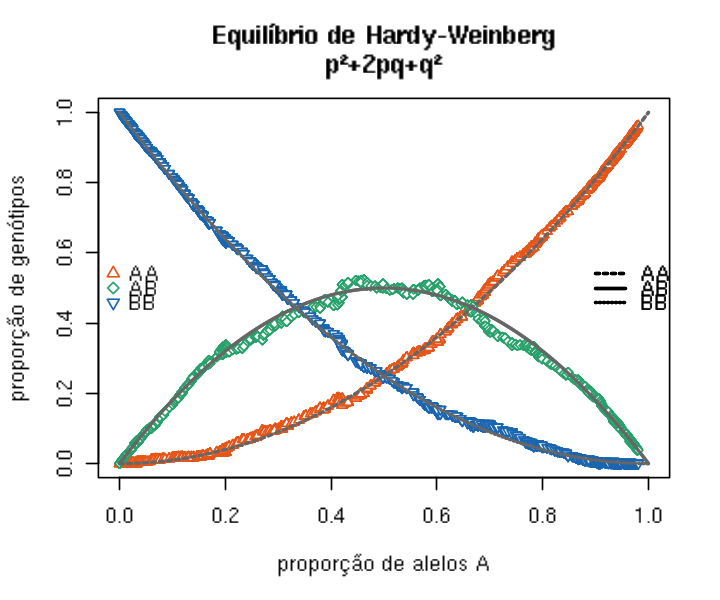

In [1]:
options(repr.plot.width=6, repr.plot.height=5) # Dimensão da figura em polegadas ou in (de inch)
source("HardyWeinberg.R")

### O que é independência?

Um delineamento  independente é aquele em que cada unidade experimental só é submetida a uma condição experimental. 

Por exemplo, três grupos com 5 indivíduos cada um (total de 15 participantes, nomeados de A a J) são alocados assim:

<div align=center>
<table cellpadding=10 cellspacing=10 border=1>
<tr>
<td></td><td><b> Condição 1 </b></td><td><b> Condição 2 </b></td><td><b> Condição 3 </b></td>
</tr>
<tr>
<td></td><td align=center>A</td><td align=center>F</td><td align=center>K</td>
</tr>
<tr>
<td></td><td align=center>B</td><td align=center>G</td><td align=center>L</td>
</tr>
<tr>
<td></td><td align=center>C</td><td align=center>H</td><td align=center>M</td>
</tr>
<tr>
<td></td><td align=center>D</td><td align=center>I</td><td align=center>N</td>
</tr>
<tr>
<td></td><td align=center>E</td><td align=center>J</td><td align=center>O</td>
</tr>
</table>
</div>

<br>
<br>
Em um delineamento relacionado, o mesmo indivíduo é submetido a todas as condições experimentais. Os mesmos 15 participantes seriam alocados assim:

<div align=center>
<table cellpadding=10 cellspacing=10 border=1>
<tr>
<td></td><td><b> Condição 1 </b></td><td><b> Condição 2 </b></td><td><b> Condição 3 </b></td>
</tr>
<tr>
<td></td><td align=center>A</td><td align=center>A</td><td align=center>A</td>
</tr>
<tr>
<td></td><td align=center>B</td><td align=center>B</td><td align=center>B</td>
</tr>
<tr>
<td></td><td align=center>C</td><td align=center>C</td><td align=center>C</td>
</tr>
<tr>
<td></td><td align=center>D</td><td align=center>D</td><td align=center>D</td>
</tr>
<tr>
<td></td><td align=center>E</td><td align=center>E</td><td align=center>E</td>
</tr>
<tr>
<td></td><td align=center>F</td><td align=center>F</td><td align=center>F</td>
</tr>
<tr>
<td></td><td align=center>G</td><td align=center>G</td><td align=center>G</td>
</tr>
<tr>
<td></td><td align=center>H</td><td align=center>H</td><td align=center>H</td>
</tr>
<tr>
<td></td><td align=center>I</td><td align=center>I</td><td align=center>I</td>
</tr>
<tr>
<td></td><td align=center>J</td><td align=center>J</td><td align=center>J</td>
</tr>
<tr>
<td></td><td align=center>K</td><td align=center>K</td><td align=center>K</td>
</tr>
<tr>
<td></td><td align=center>L</td><td align=center>L</td><td align=center>L</td>
</tr>
<tr>
<td></td><td align=center>M</td><td align=center>M</td><td align=center>M</td>
</tr>
<tr>
<td></td><td align=center>N</td><td align=center>N</td><td align=center>N</td>
</tr>
<tr>
<td></td><td align=center>O</td><td align=center>O</td><td align=center>O</td>
</tr>
</table>
</div>

### O que é balanceamento?

Em delineamentos em que os grupos são balanceados, o número de participantes em cada condição é aproximadamente igual. Por exemplo, com 15 participantes em ANOVA **independente** e **desbalanceada** poderíamos ter algo como. 
<br>
<br>
<div align=center>
<table cellpadding=10 cellspacing=10 border=1>
<tr>
<td></td><td><b> Condição 1 </b></td><td><b> Condição 2 </b></td><td><b> Condição 3 </b></td>
</tr>
<tr>
<td></td><td align=center>A</td><td align=center>H</td><td align=center>K</td>
</tr>
<tr>
<td></td><td align=center>B</td><td align=center>I</td><td align=center>L</td>
</tr>
<tr>
<td></td><td align=center>C</td><td align=center>J</td><td align=center>M</td>
</tr>
<tr>
<td></td><td align=center>D</td><td align=center></td><td align=center>N</td>
</tr>
<tr>
<td></td><td align=center>E</td><td align=center></td><td align=center>O</td>
</tr>
<tr>
<td></td><td align=center>F</td><td align=center></td><td align=center></td>
</tr>
<tr>
<td></td><td align=center>G</td><td align=center></td><td align=center></td>
</tr>
</table>
</div>

Em **delineamento intraparticipantes**, o **desbalanceamento** ocorre quando um dos participantes deixa de aparecer em uma das condições experimentais, por exemplo:

<div align=center>
<table cellpadding=10 cellspacing=10 border=1>
<tr>
<td></td><td><b> Condição 1 </b></td><td><b> Condição 2 </b></td><td><b> Condição 3 </b></td>
</tr>
<tr>
<td></td><td align=center>A</td><td align=center>A</td><td align=center>A</td>
</tr>
<tr>
<td></td><td align=center bgcolor=#444444></td><td align=center>B</td><td align=center>B</td>
</tr>
<tr>
<td></td><td align=center>C</td><td align=center>C</td><td align=center>C</td>
</tr>
<tr>
<td></td><td align=center>D</td><td align=center>D</td><td align=center>D</td>
</tr>
<tr>
<td></td><td align=center>E</td><td align=center>E</td><td align=center>E</td>
</tr>
<tr>
<td></td><td align=center>F</td><td align=center>F</td><td align=center>F</td>
</tr>
<tr>
<td></td><td align=center>G</td><td align=center>G</td><td align=center>G</td>
</tr>
<tr>
<td></td><td align=center>H</td><td align=center>H</td><td align=center>H</td>
</tr>
<tr>
<td></td><td align=center>I</td><td align=center>I</td><td align=center>I</td>
</tr>
<tr>
<td></td><td align=center>J</td><td align=cente bgcolor=#444444r></td><td align=center>J</td>
</tr>
<tr>
<td></td><td align=center>K</td><td align=center>K</td><td align=center>K</td>
</tr>
<tr>
<td></td><td align=center>L</td><td align=center>L</td><td align=center>L</td>
</tr>
<tr>
<td></td><td align=center>M</td><td align=center>M</td><td align=center>M</td>
</tr>
<tr>
<td></td><td align=center>N</td><td align=center>N</td><td align=center>N</td>
</tr>
<tr>
<td></td><td align=center>O</td><td align=center>O</td><td align=center>O</td>
</tr>
</table>
</div>

Basta uma participação faltante (**missing value**) para se caracterizar o **desbalanceamento**. O procedimento com as estatísticas padrão do R não funcionarão e teremos que usar um modelo com efeitos aleatórios; lidaremos com esta situação adiante.

### Distribuição $F$ de Fisher-Snedecor

Esta distribuição é uma generalização da estatística $t$ para três ou mais grupos. Descreve probabilidades que dependem da razão entre duas variâncias, e portanto considera graus de liberdade ($\nu$, letra grega [*ni*](https://pt.wikipedia.org/wiki/%CE%9D) ) para o numerador e para o denominador.

Para a comparação de três ou mais condições, com base na estatística $F$, os graus de liberdade do numerador dependem do número de condições e os do denominador dependem do tamanho da amostra.

Familiarize-se com a distribuição $F$, observando [*Animacao_F.R*](Animacao_F.R): 

- $F$ é um valor maior ou igual a zero.
- sob $H_0$ a distribuição $F$ tem um parâmetro de não centralidade (<code>ncp</code>) igual a zero; sob $H_1$ o parâmetro de não centralidade é maior do que zero.
- esta distribuição é assimétrica.
- consideramos somente a cauda superior.
- localize $\alpha$ e $\beta$.
- há dois valores para graus de liberdade: para o numerador (número de grupos - 1) e denominador (número de sujeitos - número de grupos).
- observe o que acontece com a distribuição $F$ sob $H_0$ e com o valor de $F$ crítico ($F_c$) à medida que os graus de liberdade aumentam.

O delineamento dos estudos, o tipo de variável e, consequentemente, a estatística adequada mudam, mas o problema é sempre o mesmo: incerteza porque lidamos com uma amostra.

### Amostragem

<center><img src="./image/pop_amostra.png" alt="Drawing" style="width: 300px;"/> <br>
Figure 1- Procedimento de inferência de parâmetros populacionais (média, $\mu$, e variância, $\sigma^2$ ) <br> realiza-se por meio de amostragem aleatorizada (média amostral, $\overline{x}$, e variância amostral, $s^2$).
</center>
<br>
<br>

<br>
<br>
A diferença, aqui, é que teremos que lidar com 3 ou mais amostras simultaneamente.

<center><img src="./image/pop_amostra_3.png" alt="Drawing" style="width: 400px;"/></center>

<br>
<br>
<br>
A hipótese nula é pela igualdade de todos os $m$ grupos. caso não rejeitemos $H_0$:

<center><img src="./image/pop_amostra_3_H0.png" alt="Drawing" style="width: 300px;"/></center>
<br>
<br>

<br>
<br>
<br>
Quando rejeitamos $H_0$ assumimos que todas as condições são diferentes entre si:

<center><img src="./image/pop_amostra_3.png" alt="Drawing" style="width: 400px;"/></center>
<br>
<br>

<br>
<br>
<div align=center><big>ou</big></div>

que pelo menos uma destoe das demais (i.e., basta que uma das condições ser diferente das demais para rejeitarmos $H_0$.), por exemplo:

<center><img src="./image/pop_amostra_3_H1.png" alt="Drawing" style="width: 400px;"/></center>

### Teste $t$ para duas condições

Brendon Small e Coach McGuirk fazem com que seus alunos do SNAP-Ed mantenham diários do que comem por uma semana e depois calculem a ingestão diária de sódio em miligramas.

Desde que as classes receberam diferentes programas de educação nutricional, eles querem verificar se a ingestão média de sódio é a mesma para as duas turmas.

Aplicamos o teste $t$ de Satterthwaite (_a.k.a._ Welch), robusto e _default_ do R:

In [2]:
# dados
library(readxl)
Dtfrm <- read_excel("Nutricao.xlsx")
# significancia estatistica
t_out <- t.test(Sodium ~ Instructor, data = Dtfrm)
print(t_out)


	Welch Two Sample t-test

data:  Sodium by Instructor
t = 0.76722, df = 34.893, p-value = 0.4481
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -67.91132 150.41132
sample estimates:
mean in group Brendon Small mean in group Coach McGuirk 
                    1287.50                     1246.25 



### testes $t$ quando temos três ou mais turmas

Suponha que uma terceira classe junte-se ao experimento (Melissa Robins). Podemos, então, verificar as diferenças destas três condições experimentais com testes $t$, comparando-se Brendon Small com Coach McGuirk, Brendon Small com Melissa Robins e Coach McGuirk com Melissa Robins?

<div align=center><font style="font-size:150%">
Quantos testes $t$ precisaríamos efetuar em função do número de grupos?

<center><img src="./image/hammer.png" alt="Drawing" style="width: 100px;"/></center>

<div align=right><font style="font-size:45%;">https://www.toolsbr.com.br/produto/dewalt-martelo-20-oz-rip-claw-hammer-94480</font></div>

</font></div>
É a combinatória dois a dois do número de grupos, $m$:
$${m \choose 2} = { {m!} \over {2! (m-2)!} }$$

- para $m=2$ grupos: ${2 \choose 2} = { {2!} \over {2! (2-2)!} } = 1~\text{teste}$

<center><img src="./image/t2.png" alt="Drawing" style="width:100px;"/></center>
<br>
<br>

<br>
<br>
- para $m=3$ grupos: ${3 \choose 2} = { {3!} \over {2! (3-2)!} } = 3~\text{testagens}$

<center><img src="./image/t3.png" alt="Drawing" style="width: 100px;"/></center>
<br>

<br>
<br>
- para $m=4$ grupos: ${4 \choose 2} = { {4!} \over {2! (4-2)!} } = 6~\text{testagens}$

<center><img src="./image/t4.png" alt="Drawing" style="width:100px;"/></center>

<br>
<br>
<br>
- para $m=6$ grupos: ${6 \choose 2} = { {6!} \over {2! (6-2)!} } = 15~\text{testagens}$

<center><img src="./image/t6.png" alt="Drawing" style="width:150px;"/></center>

Graficamente vemos:

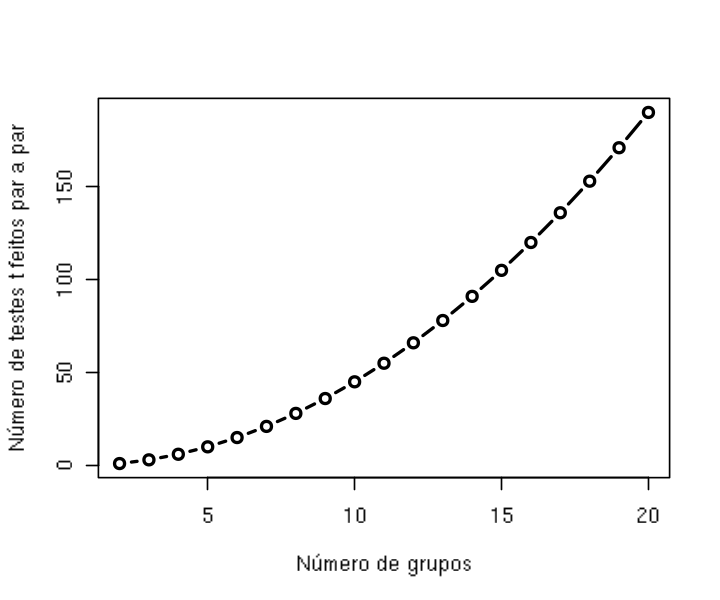

In [3]:
# Testes_t_2a2.R
# Ilustra o numero de testes t necessarios
# para comparar grupos par a par

combinacoes <- c()
grupos <- c()
for (g in 2:20)
{
  grupos <- c(grupos,g)
  combinacoes <- c(combinacoes,choose(g,2))
}
plot(grupos,combinacoes,
     xlab="Número de grupos",
     ylab="Número de testes t feitos par a par",
     lwd=2,
     type="b")

Embora o número cresça rapidamente, podemos não nos impressionar pois temos computadores para o trabalho repetitivo. Há, porém, um problema mais grave: as probabilidades dos erros do tipo I ($\alpha$) e do tipo II ($\beta$) se acumulam. Quando escolhemos $\alpha$, **a probabilidade de rejeitar incorretamente a hipótese nula**, o máximo valor que $p$ pode assumir, a probabilidade deste erro para $m$ grupos é:

$$P(\alpha | m) = 1-(1-\alpha)^{m \choose 2}$$

Também gostaríamos de manter a **probabilidade de rejeitar corretamente a hipótese nula**, o poder do teste, $1-\beta$; para $m$ grupos é:

$$P(\beta | m) = (1-\beta) ^ {m \choose 2}$$

Graficamente podemos observar o que acontece com o número crescente de pares de teste $t$ necessários, considerando os tradicionais $\alpha=0.05$ e $\beta=0.1$:

# Testes_t_AlfaPoder.R
# Ilustra o valor de alfa e 1-beta
# com numero crescente de testes 

source("friendlycolor.R")

cor_alfa <- friendlycolor(8)
cor_poder <- friendlycolor(20)

alfa_escolhido <- 0.05
beta_escolhido <- 0.20
alfa <- c()
poder <- c()
grupos <- c()
for (g in 2:20)
{
  grupos <- c(grupos,g)
  combinacoes <- choose(g,2)
  
  alfa <- c(alfa,1-(1-alfa_escolhido)^combinacoes)
  poder <- c(poder,(1-beta_escolhido)^combinacoes)
}
plot(grupos, poder,
     xlab="Número de grupos",
     ylab="Probabilidade",
     ylim=c(0,1),
     lwd=2, lty=2, col=cor_poder,
     type="b")
lines(grupos,alfa,
      lwd=2, lty=1, col=cor_alfa, 
      type="b")
legend("right",
       c("alfa", "poder"),
       col=c(cor_alfa,cor_poder),
       lwd=c(2,2),
       lty=c(1,2),
       box.lwd=0, bg="transparent")

Portanto, a probabilidade de erro do tipo I cresce rapidamente para quase $100\%$ e o poder de seus testes combinados vai para zero. Na prática, dificilmente teremos mais do que 6 grupos mas, ainda assim, teríamos $\alpha \approx 53.7\%$ e poder $1-\beta \approx 3.5\%$, valores totalmente inaceitáveis para uma boa análise estatística.

<div align=center><font style="font-size:150%">
Podemos analisar com múltiplos testes $t~$?  A resposta é:

<center><img src="./image/meme_NO.png" alt="Drawing" style="width:150px;"/></center>

<br>
<font style="font-size:250%">NÃO!</font>

Precisamos testar tudo simultaneamente para<br>
manter $\alpha$ no valor desejado e<br>
preservar $1-\beta$.
</font></div>

# Análise de variância

Esta análise, que tem o acrônimo ANOVA (do inglês, **An**alysis **o**f **Va**riance) utiliza **comparações de variâncias** por meio de teste $F$ para se obter ...

<div align=center><font style="font-size:150%">
... as conclusões são sobre as médias dos $m$ grupos.<br>

Como?

<center><img src="./image/bebesurpreso.png" alt="Drawing" style="width:100px;"/></center>

</font></div>

### Princípio do teste ANOVA unifatorial

Consideremos que existam três grupos com distribuição normal. De cada um deles, retiramos uma amostra:

<center><img src="./image/pop3.png" alt="Drawing" style="width: 500px;"/></center>

<center><img src="./image/amo3.png" alt="Drawing" style="width: 500px;"/></center>

Não havendo problemas, as três amostras reproduzem a distribuição, média e variância das populações das quais se originaram.  

A distribuição $F$ é dada por
$$F = {{S_E^2}\over{S_D^2}}$$
onde $S_E^2$ é a variância **entre** os grupos e $S_D^2$ é a variância **dentro** dos grupos.

#### Variância entre (*between*) os grupos

A variância entre os grupos presume que as médias amostrais ($\bar{X}_m$) refletem as respectivas médias populacionais ($\mu_m$):

<center><img src="./image/variancia_entre.png" alt="Drawing" style="width: 350px;"/></center>

Como sempre, não temos esta certeza e lidamos somente com a informação das amostras, $\bar{X}_m$:

<center><img src="./image/variancia_entre_amo.png" alt="Drawing" style="width:350px;"/></center>

Cada média é um número e, portanto, podemos calcular a variância destes valores:

<center><img src="./image/variancia_entre_SE.png" alt="Drawing" style="width: 400px;"/></center>

<br>
<center><img src="./image/bebesurpreso_SE.png" alt="Drawing" style="width: 300px;"/></center>

Sendo assim, para $F = {{S_E^2}\over{S_D^2}}$, a estatística $F$ aumenta quando a variância entre os grupos/condições (ou as médias entre grupos)  aumentar.

#### Variância dentro (*within*) dos grupos

A variância dentro dos grupos é uma medida da variância total, desconsiderando a média de cada uma das condições. Cada amostra tem sua própria distribuição (presumivelmente, reflexo da distribuição da população de onde veio):

<center><img src="./image/variancia_dentro.png" alt="Drawing" style="width:400px;"/></center>

<br>
<br>
Como sempre, não temos esta certeza e lidaremos somente com a informação das amostras, $S_{m}$:
<br>
<br>
<br>

<center><img src="./image/variancia_dentro_amo.png" alt="Drawing" style="width: 400px;"/></center>

***

Mesclando as três distribuições, estimamos a variância dentro dos grupos, $S_D^2$, uma medida de quanto, como um todo, a variável é dispersa:

<center><img src="./image/variancia_dentro_SD.png" alt="Drawing" style="width: 400px;"/></center>

Caso a variância em cada condição seja maior,

<center><img src="./image/variancia_dentro_SD3.png" alt="Drawing" style="width: 400px;"/></center>

esta variância será refletida em $S_D^2$:

<center><img src="./image/variancia_dentro_SDmais.png" alt="Drawing" style="width: 400px;"/></center>

<center><img src="./image/bebesurpreso_SD.png" alt="Drawing" style="width: 300px;"/></center>

Sendo assim, para $F = {{S_E^2}\over{S_D^2}}$, a estatística $F$ diminui quando a variância dentro os grupos (ou condições) aumentar.

#### Comportamento de $F = {{S_E^2}\over{S_D^2}}$

É fácil imaginar o comportamento da estatística $F$ combinando-se o que pode acontecer com $S_E^2$ e $S_D^2$:

***

<center><img src="./image/F_X_s.png" alt="Drawing" style="width: 700px;"/></center>

***

<center><img src="./image/F_SE_SD.png" alt="Drawing" style="width: 800px;"/></center>

***

Desta forma, Ronald Fisher inventou uma **genial** forma de comparar médias entre várias condições, simultaneamente, utilizando somente a comparação entre duas variâncias, com o numerador refletindo a dispersão das médias e o denominador refletindo a dispersão do fenômeno em estudo. 

<center><img src="./image/bebesurpreso_F.png" alt="Drawing" style="width: 300px;"/></center>

# Métodos Robustos

<center><img src="./image/defender.png" alt="Drawing" style="width: 300px;"/></center>

<div align=right><small>https://performancedrive.com.au/icon-land-rover-defender-90-6-2-chev-v8-1606/</small></div>

## ANOVA para condições independentes

Utilizada quando os participantes são avaliados em somente uma das condições experimentais, i.e., um delineamento independente ou entre participantes.

### Suposições

- independência entre as unidades experimentais,
- normalidade da VD em todas as condições,
- homocedasticidade da VD entre todas as condições.

***

<img src="./image/coruja.png" alt="Drawing" style="width: 75px;float: left;"/>  
<div class="alert alert-block alert-success">


**Normalidade e balanceamento**:

> “O teste t é ainda um teste válido, mesmo com modestas violações na
suposição de normalidade, particularmente quando os tamanhos dos
grupos são iguais e existe um número razoável de participantes em
cada grupo; por “razoável” entendemos que, em um delineamento
completamente entre participantes, deve haver pelo menos 12
participantes por grupo[...]” (Dancey & Reidy, 2019, p. 472)

Então:
- se o número de unidades experimentais é igual a pelo menos 12 em cada grupo, a suposição de normalidade não é necessária.

- se os grupos são balanceados, homocedasticidade não é necessária.

***
O balanceamento não precisa ser estrito:

> “Consideram-se grupos de dimensão semelhante quando o quociente entre a maior dimensão e a menor for inferior a 1,5.” (Pestana, M. & Gageiro, J. (2008) Análise de dados para
Ciências Sociais: a complementaridade do SPSS. Lisboa: Sílabo, p. 278)

Então:

- Se a maior quantidade de unidades observacionais numa condição NÃO superar 1,5 vezes a condição de menor quantidade de unidades observacionais, então a suposição de homocedasticidade não precisa ser considerada para o teste ANOVA unifatorial independente.
</div>
***

***

<img src="./image/coruja.png" alt="Drawing" style="width: 75px;float: left;"/>  
<div class="alert alert-block alert-success">

**Homocedasticidade**:

Em geral, quando você tiver tamanhos de amostras iguais, a suposição de homocedasticidade não será um grande problema.
<div align=right><small>- Dancey & Reidy (2019), p. 472-3</small></div>

- ANOVA unifatorial independente de Fisher para condições **balanceadas** é adequada na situação de heterocedasticidade populacional.
- ANOVA unifatorial independente de Welch para condições **desbalanceadas** é adequada na situação de heterocedasticidade populacional.

A homocedasticidade ocorre heuristicamente se $\frac{(\text{maior desvio-padrão})}{(\text{menor desvio-padrão})} > 2$.
> <div align=right><small> Johnson, R. & Wichern, D. (2007) Applied Multivariate Statistical Analysis. 6 th ed. NJ: Prentice-Hall, p. 291</small></div>
> <div align=right><small> Moore, D. (1995) The basic practice of statistics. New York: W. H. Freeman and Company,<br>
(citado em Norusis, M. (2009) PASW Statistics 18: Statistics Procedures Companion. NJ: Prentice-Hall, p. 148)</small></div>
</div>

***

### Situação

<img src="./image/snaped.png" alt="Drawing" style="width: 100px;float: left;"/>


* O SNAP-Ed (Supplemental Nutrition Assistance Program Education) é um programa baseado em evidências que ajuda as pesso as a terem uma vida mais saudável.

* O SNAP-Ed ensina às pessoas que usam ou qualificam para o SNAP uma boa nutrição e como fazer com que o seu dinheiro de alimentação se estenda ainda mais.

* Os participantes do SNAP-Ed também aprendem a ser fisicamente ativos.

<div align=right><small>https://www.fns.usda.gov/snap/supplemental-nutrition-assistance-program-education-snap-ed</small></div>

### Planejamento

Brendon Small, Coach McGuirk e Melissa Robins fazem com que seus alunos do SNAP-Ed mantenham diários do que comem por uma semana e depois calculem a ingestão diária de sódio em miligramas.

Desde que as classes receberam diferentes programas de educação nutricional, eles querem ver se a ingestão média de sódio é a mesma para as três turmas.

### Hipóteses nula e alternativa

As três classes receberam diferentes programas de educação nutricional. A ingestão média de sódio é a mesma (populacionalmente) para os três programas?

$H_0: \mu_{\text{Small}} = \mu_{\text{McGuirk}} = \mu_{\text{Robins}}$<br>
$H_1: \exists |\mu_i \ne \mu_j; i \ne j; i,j=\text{Small},\text{McGuirk},\text{Robins}$<br>
Para nível de significância $\alpha=0,05$.

***

<img src="./image/coruja.png" alt="Drawing" style="width: 75px;float: left;"/>  
<div class="alert alert-block alert-success">


Esta é uma forma matemática para escrever a hipótese alternativa, lida como "Existe pelo menos alguma média $\mu_i$, diferente de outra média $\mu_j$, com $i$ e $j$ assumindo os valores $1$, $2$ ou $3$". É dizer que $\mu_1 \ne \mu_2$ **ou** $\mu_1 \ne \mu_3$ **ou** $\mu_2 \ne \mu_3$.

Normalmente expressa como: 
$$H_1: \mu_1 \ne \mu_2 \ne \mu_3$$
tentando indicar as diferenças, mas esta forma não funciona porque sugere que a rejeição de $H_0$ implica em que todos os grupos sejam diferentes entre si, como $\mu_1 \ne \mu_2$ **e** $\mu_1 \ne \mu_3$ **e** $\mu_2 \ne \mu_3$. 

Basta que uma condição tenha média estatisticamente diferente das demais para que se rejeite $H_0$ com ANOVA. Em português:

$$H_1: \text{Existe pelo menos um grupo diferente de algum outro.}$$
    </div>
***

# Operacionalização do teste

### ANOVA unifatorial independente de Fisher com ajuste para heterocedasticidade de White

A estatística descritiva e inferencial pode ser obtida com [ANOVA1f_indep_FisherWhite_sodio.R](ANOVA1f_indep_FisherWhite_sodio.R):

### Executando  `ANOVA1f_indep_FisherWhite_sodio.R`

Loading required package: emmeans

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess





 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1123.75 143.15 1112.5 1120.31 185.32 900 1400   500 0.08     -1.1
      se
X1 32.01


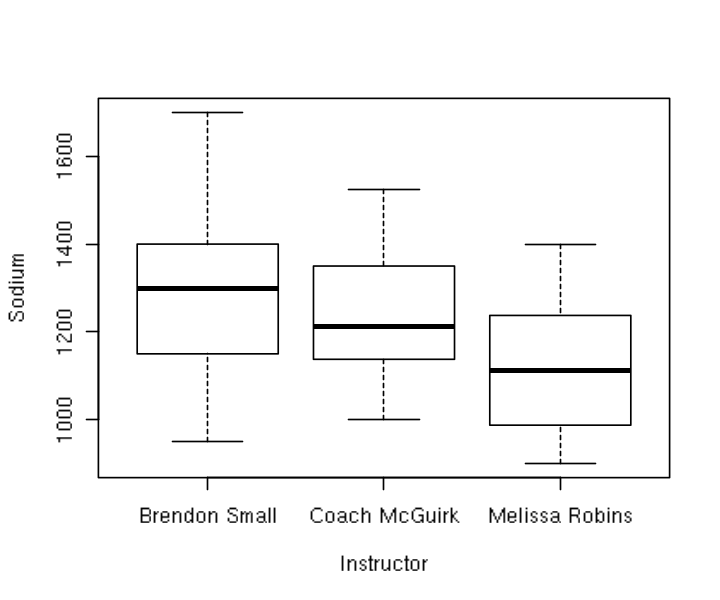

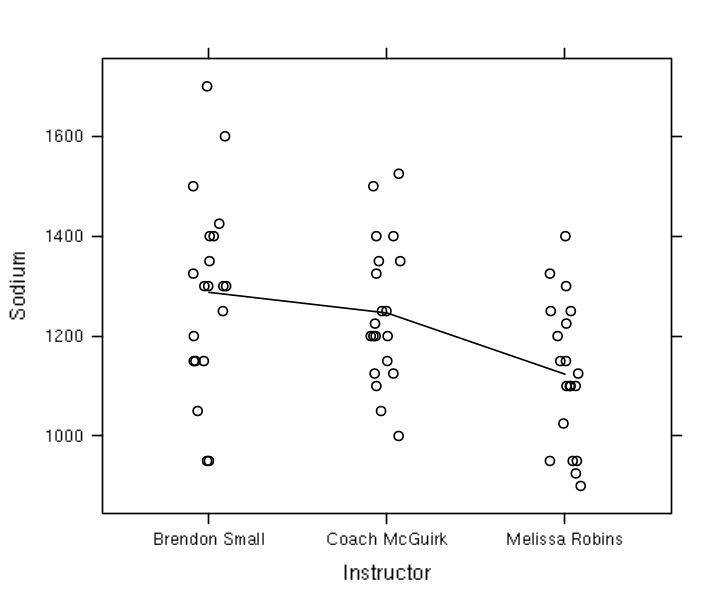

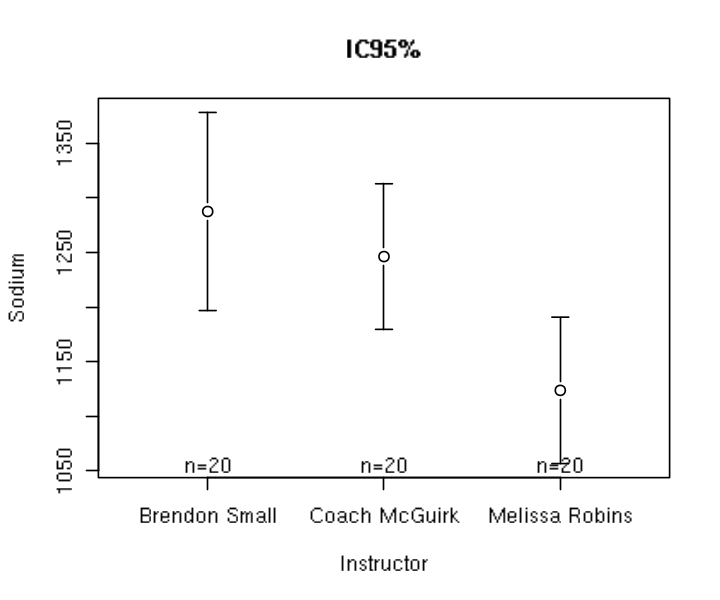



ANOVA unifatorial independente de Fisher 
com ajuste para heterocedasticidade de White:

VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus


Coefficient covariances computed by hccm()



Analysis of Deviance Table (Type II tests)

Response: Sodium
           Df      F   Pr(>F)   
Instructor  2 5.5748 0.006148 **
Residuals  57                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Analise de significancia pratica: tamanho de efeito
- eta^2 = 0.1636056 
Grau grande de explicacao da variancia da VD Sodium pela VI Instructor 


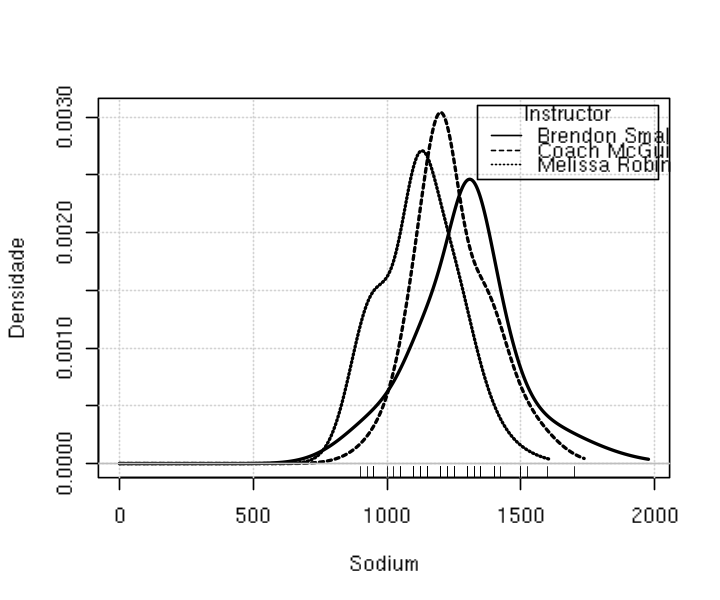



Selecao de modelo
- R^2 ajustado = 0.0731098 
- omega^2 =  0.07195982 

Teste post hoc
 Instructor     emmean   SE df lower.CL upper.CL
 Brendon Small    1288 36.1 57     1215     1360
 Coach McGuirk    1246 36.1 57     1174     1319
 Melissa Robins   1124 36.1 57     1051     1196

Confidence level used: 0.95 


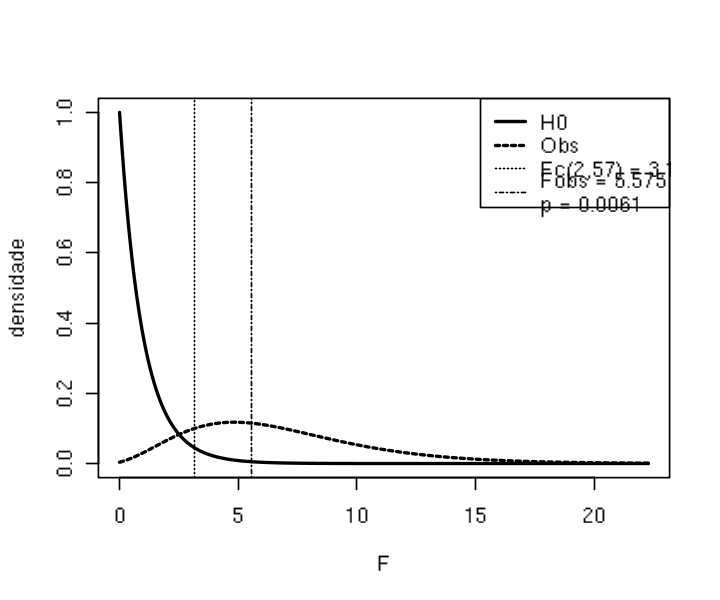



Testes post hoc:

Legenda:
	A ... Brendon Small
	B ... Coach McGuirk
	C ... Melissa Robins

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = Sodium ~ Instructor, data = TH)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
B - A == 0   -41.25      51.09  -0.807  1.00000   
C - A == 0  -163.75      51.09  -3.205  0.00664 **
C - B == 0  -122.50      51.09  -2.398  0.05939 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)



   A    B    C 
 "a" "ab"  "b" 

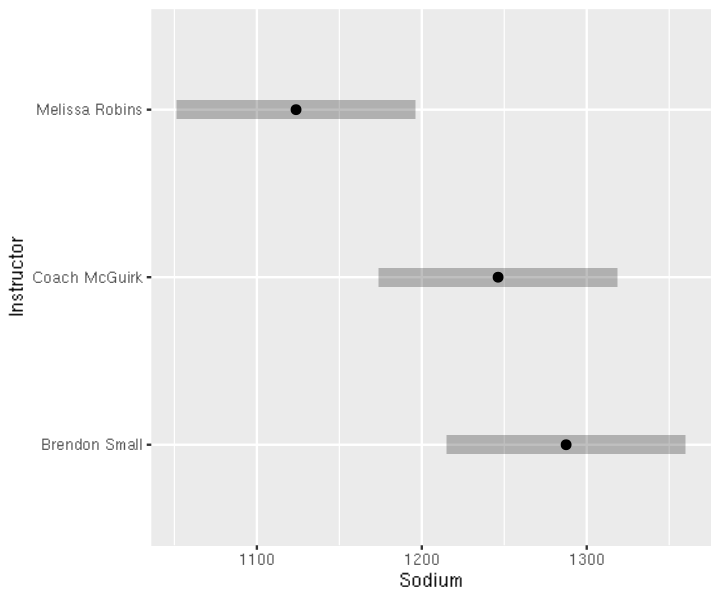


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lm(formula = Sodium ~ Instructor, data = TH)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
B - A == 0   -41.25      51.09  -0.807  0.84559   
C - A == 0  -163.75      51.09  -3.205  0.00443 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)



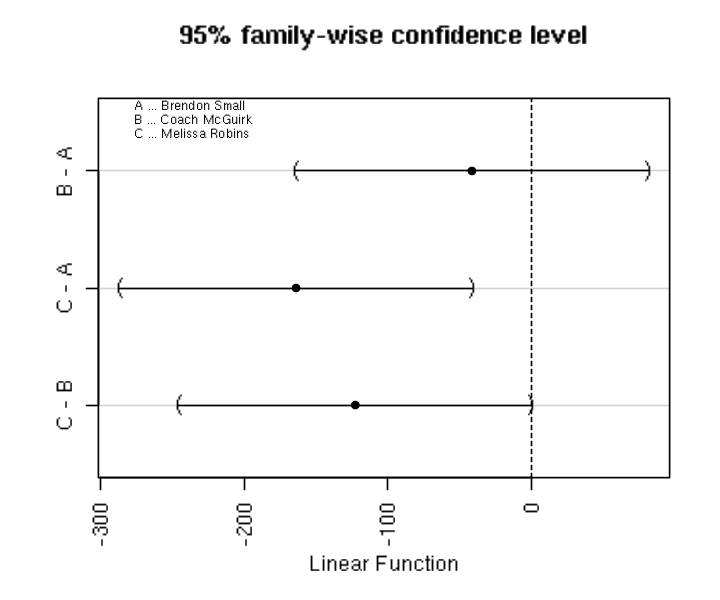

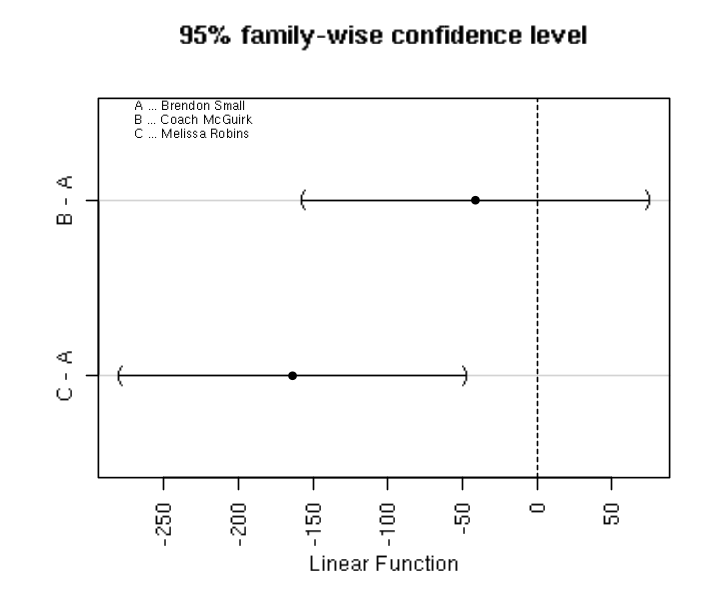

In [4]:
# Instala a biblioteca emmeans se não presente em seu ambiente R.
if (!require("emmeans")) install.packages("emmeans",repo="https://vps.fmvz.usp.br/CRAN/",dep=TRUE)

# ANOVA1f_indep_FisherWhite_sodio.R
# para ajustar este RScript para outros dados
# troque a planilha xlsx e substitua as palavras
# Instructor pela nova VI (fator)
# Sodium pela nova VD (resposta)

library(psych)
library(lattice)
library(car)
library(multcomp)
library(gplots)
library(emmeans)
library(readxl)

# suppress warnings
options(warn=-1)

TH <- read_excel("Nutricao3.xlsx")
TH$Instructor <- factor(TH$Instructor, levels=unique(TH$Instructor))

print(with(TH, psych::describeBy(Sodium,Instructor,digits=2)))
boxplot(Sodium~Instructor,data=TH,
        ylab=names(TH)[which(names(TH)=="Sodium")],
        xlab=names(TH)[which(names(TH)=="Instructor")]
)
print(grf <- lattice::xyplot(Sodium~Instructor, data=TH, type=c("p","a"),
                             jitter.x=TRUE, col="black"))
with(TH, gplots::plotmeans(Sodium~Instructor,
                           error.bars="conf.int", level=.95,
                           connect=FALSE,
                           ylab=names(TH)[which(names(TH)=="Sodium")],
                           xlab=names(TH)[which(names(TH)=="Instructor")],
                           main="IC95%",
                           barcol="black"))
car::densityPlot(Sodium~Instructor, data=TH, rug=TRUE, from=0, normalize=TRUE,
                 na.rm=TRUE, ylab="Densidade", col=c("black", "black", "black"))
cat("\n")

cat("\nANOVA unifatorial independente de Fisher",
    "\ncom ajuste para heterocedasticidade de White:\n\n")
alfa <- 0.05
VD <- names(TH)[which(names(TH)=="Sodium")]
VI <- names(TH)[which(names(TH)=="Instructor")]
cat("VD =", VD,"\n")
cat("Fator =", VI,"\n")
cat("\nAnalise de significancia estatistica: teste omnibus\n")
modelo <- lm(Sodium~Instructor, data=TH)
print(res <- car::Anova(modelo, type=2, white.adjust=TRUE))
cat("\nAnalise de significancia pratica: tamanho de efeito\n")
F <- res$F[1]
dfn <- res$Df[1]
dfd <- res$Df[2]
eta2 <- dfn*F/(dfn*F+dfd)
if (0 <= eta2 & eta2 < 0.1) {geta2 <- "minimo"}
if (0.1 <= eta2 & eta2 < 0.6) {geta2 <- "pequeno"}
if (0.6 <= eta2 & eta2 < 0.14) {geta2 <- "intermediario"}
if (0.14 <= eta2 & eta2 <= 1.0) {geta2 <- "grande"}
cat("- eta^2 =", eta2, "\nGrau", geta2,
    "de explicacao da variancia da VD", VD,"pela VI", VI,"\n")
f2 <- eta2/(1-eta2) # tamanho de efeito f de Cohen
ncp <- dfd*f2 # parametro de nao-centralidade
fc <- qf(1-alfa, dfn, dfd, 0)
p <- 1-pf(F,dfn,dfd,0)
if (p < 1e-4)
{
  p <- sprintf("%.2e",p)
} else
{
  p <- sprintf("%.4f",p)
}
f <- seq(0,2*ncp,0.01)
densf <- df(f, dfn, dfd, 0)
plot(f, densf, xlab="F", ylab="densidade", lwd=2, type="l")
densf <- df(f, dfn, dfd, ncp)
lines(f,densf, lwd=2, lty=2)
abline(v=fc, lty=3)
abline(v=F, lty=4)
legend("topright",
       c("H0", "Obs", 
         paste("Fc(",dfn,",",dfd,") = ",round(fc,3),sep=""), 
         paste("Fobs = ",round(F,3),"\n",
               "p = ",p,sep="") 
         ), 
       lwd=c(2,2,1,1), lty=c(1,2,3,4))
cat("\n\nSelecao de modelo\n")
R2aj <- (F-1)/((F-1)+dfd+1)
cat("- R^2 ajustado =", R2aj, "\n")
omega2 <- (F-1)/((F-1)+dfd+2)
cat("- omega^2 = ", omega2,"\n\n")
cat(paste("Teste post hoc\n"))
print(EMM <- emmeans::emmeans(modelo, "Instructor"))
print(grf <- plot(EMM, colors = "black",
                  main="Estimated Marginal Means",
                  xlab=VD,
                  ylab=VI))

# Testes post hoc
cat("\n\nTestes post hoc:\n")

# nomes do fator encurtados
TH$Instructor <- as.character(TH$Instructor)
fatores <- unique(as.character(TH$Instructor))
letra <- "A"
legenda <- c()
cat ("\nLegenda:\n")
for( f in 1:length(fatores))
{
  cat("\t",letra," ... ",fatores[f],"\n",sep="")
  legenda <- c(legenda,paste(letra," ... ",fatores[f],"\n",sep=""))
  TH$Instructor[TH$Instructor==fatores[f]] <- letra
  ascii <- strtoi(charToRaw(letra),16L)
  letra <- rawToChar(as.raw(ascii+1))
}
TH$Instructor <- as.factor(TH$Instructor)
modelo <- lm(Sodium~Instructor, data=TH)
mc.tuckey <- multcomp::glht(modelo, linfct = mcp(Instructor = "Tukey"))
print(mcs.tuckey <- summary(mc.tuckey, test=adjusted("bonferroni")))
multcomp::cld(mcs.tuckey, level=alfa, decreasing=TRUE)
plot(mc.tuckey,las=3)
legend("topleft",legenda,lwd=0,lty=0,cex=0.6,box.lwd=0, bg="transparent")
mc.dunnett <- multcomp::glht(modelo, linfct = mcp(Instructor = "Dunnett"))
mcs.dunnett <- summary(mc.dunnett, test=adjusted("bonferroni"))
print(mcs.dunnett)
plot(mc.dunnett,las=3)
legend("topleft",legenda,lwd=0,lty=0,cex=0.6,box.lwd=0, bg="transparent")

# enable warnings
options(warn=0)

Obtendo:


 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1123.75 143.15 1112.5 1120.31 185.32 900 1400   500 0.08     -1.1
      se
X1 32.01


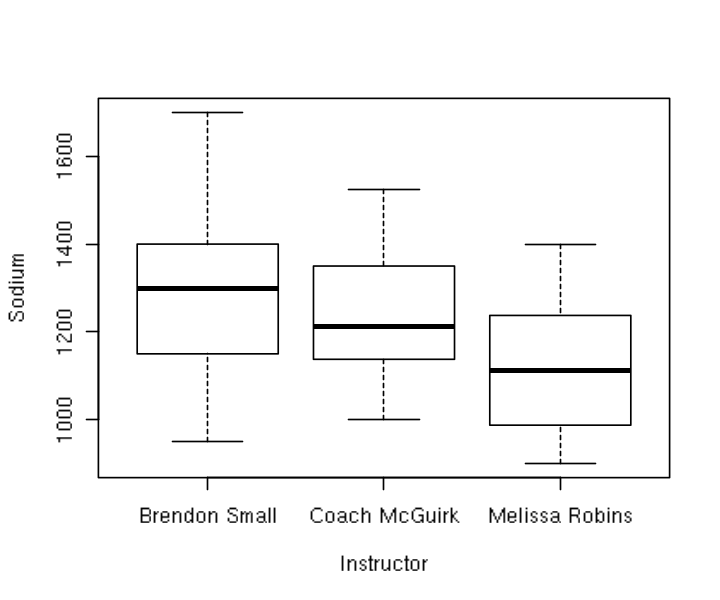

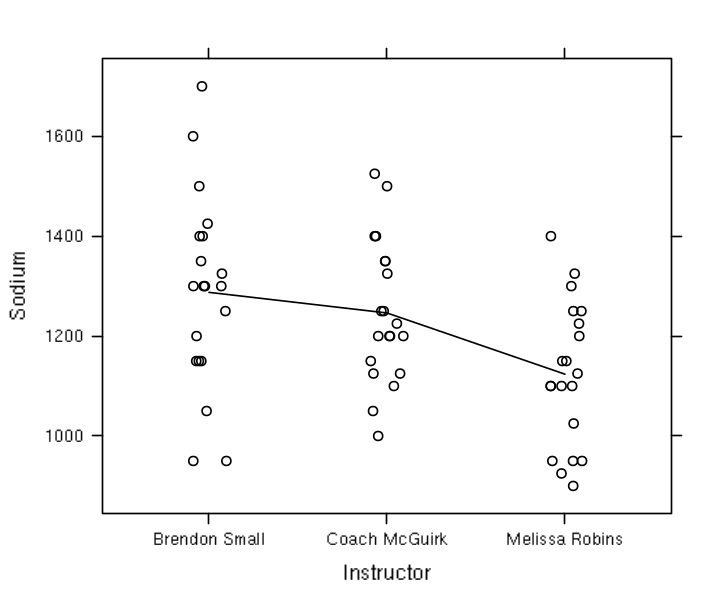



ANOVA unifatorial independente de Fisher 
com ajuste para heterocedasticidade de White:

VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus


Coefficient covariances computed by hccm()



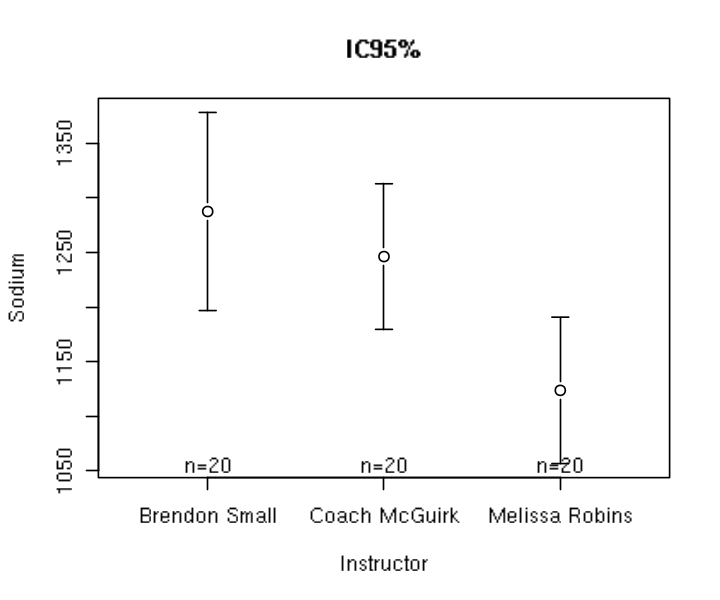

Analysis of Deviance Table (Type II tests)

Response: Sodium
           Df      F   Pr(>F)   
Instructor  2 5.5748 0.006148 **
Residuals  57                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Analise de significancia pratica: tamanho de efeito
- eta^2 = 0.1636056 
Grau grande de explicacao da variancia da VD Sodium pela VI Instructor 


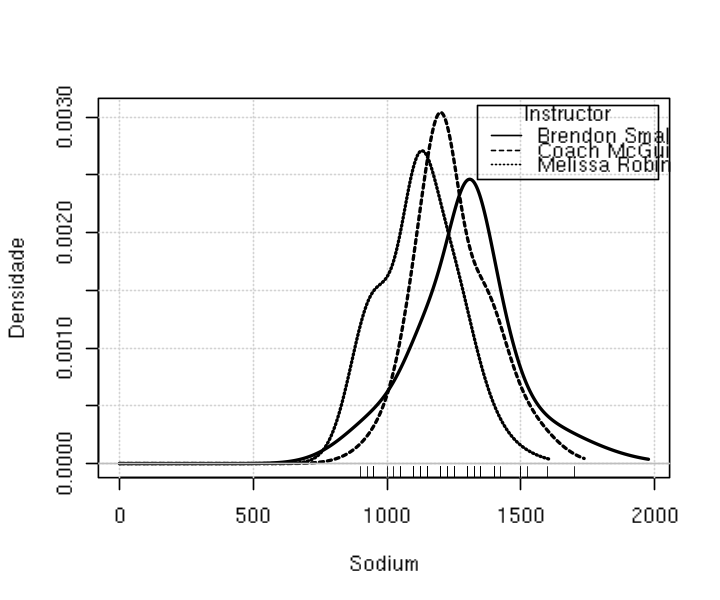



Selecao de modelo
- R^2 ajustado = 0.0731098 
- omega^2 =  0.07195982 

Teste post hoc
 Instructor     emmean   SE df lower.CL upper.CL
 Brendon Small    1288 36.1 57     1215     1360
 Coach McGuirk    1246 36.1 57     1174     1319
 Melissa Robins   1124 36.1 57     1051     1196

Confidence level used: 0.95 


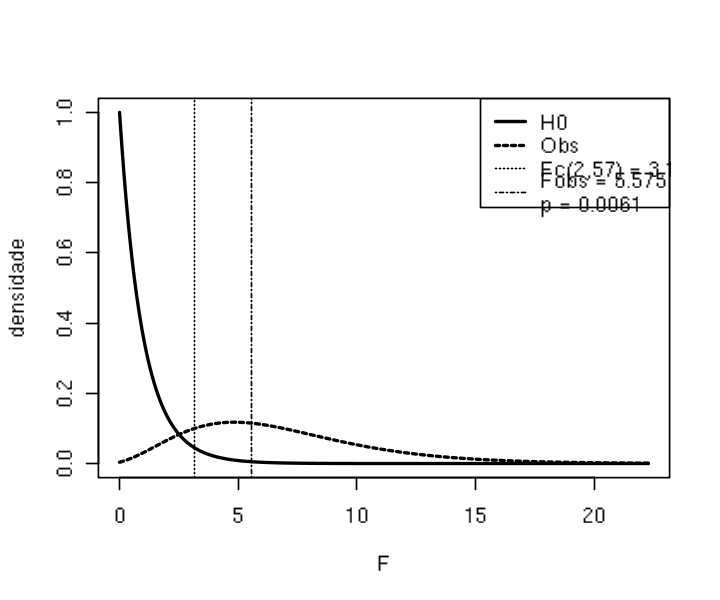



Testes post hoc:

Legenda:
	A ... Brendon Small
	B ... Coach McGuirk
	C ... Melissa Robins

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = Sodium ~ Instructor, data = TH)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
B - A == 0   -41.25      51.09  -0.807  1.00000   
C - A == 0  -163.75      51.09  -3.205  0.00664 **
C - B == 0  -122.50      51.09  -2.398  0.05939 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)



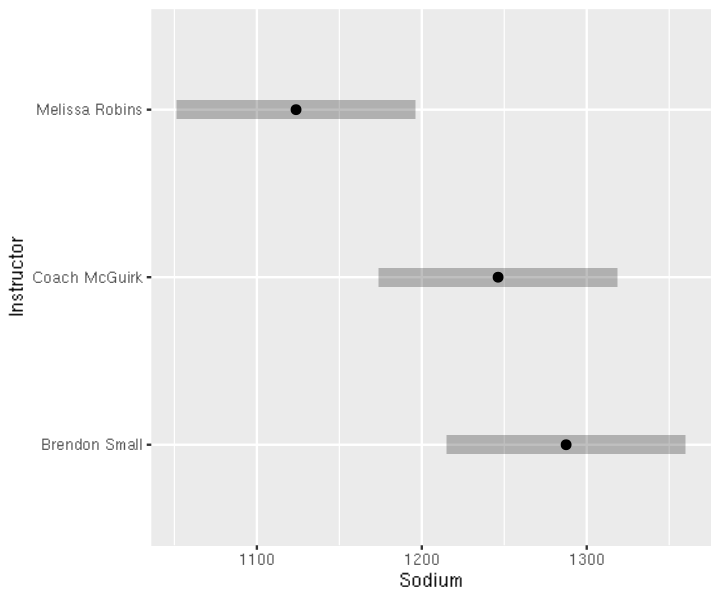


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lm(formula = Sodium ~ Instructor, data = TH)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
B - A == 0   -41.25      51.09  -0.807  0.84559   
C - A == 0  -163.75      51.09  -3.205  0.00443 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- bonferroni method)



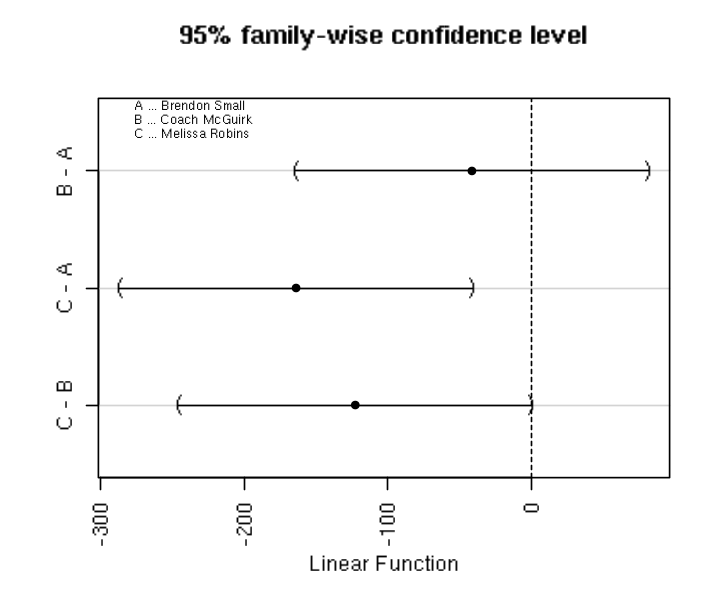

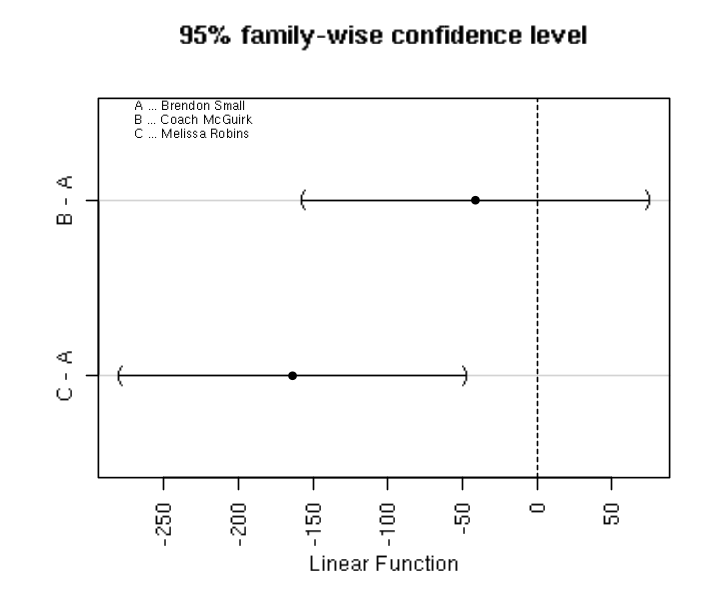

In [5]:
source("ANOVA1f_indep_FisherWhite_sodio.R")

Analise a saída deste _RScript_ e encontre:

- a estatística descritiva (textual e gráficos)
- a ANOVA unifatorial
    - encontre os graus de liberdade $F$(`r res$Df`).
    - o valor de $F$ calculado, igual a `r round(res$F,4)`.
    - o valor de $p$ correspondente, igual a `r round(1-pf(res$F,dfn,dfd,0),6)`.
    - o tamanho de efeito, $\eta^2$=`r eta2`.
- os testes _post hoc_ com a legenda:

In [6]:
for (l in 1:length(legenda))
{
  cat("\t\t",legenda[l],"\n")
}

		 A ... Brendon Small
 
		 B ... Coach McGuirk
 
		 C ... Melissa Robins
 


- e seus resultados em:
    - contrastes de Tukey (textual e gráfico) com os respectivos valores $p$: `r mcs.tuckey$test$pvalues` 
    - contrastes de Dunnett (textual e gráfico) com os respectivos valores $p$: `r mcs.dunnett$test$pvalues`

***

<img src="./image/coruja.png" alt="Drawing" style="width: 75px;float: left;"/>  
<div class="alert alert-block alert-success">

Existem muitas famílias de testes para análise _post hoc_ disponíveis.

Uma família de testes para análise _post-hoc_ mais conservadora é adequada quando há um grande número de comparações como, por exemplo, o das diferenças honestamente significantes (DHS) de Tukey.

<small>"O Teste proposto por Tukey (1953) é também  conhecido como teste de Tukey da diferença honestamente significativa (honestly significant difference)(HSD) e teste de Tukey da diferença totalmente significativa (wholly significant difference)(WSD). É um teste exato em que, para  a família de todas as $c=\frac{1}{2}k(k-1)$ comparações duas a duas, a taxa de erro da família dos testes (FWER) é exatamente $\alpha$ (e o intervalo de confiança é exatamente $1-\alpha$). Métodos de comparações múltiplas exatos são raros. O teste de Tukey tem sido mostrado analiticamente ótimo, no sentido que, entre todos  os procedimentos que resultam em intervalos de confiança com mesmo tamanho para todas diferenças duas a duas com coeficiente de confiança da família  de pelo menos $1-\alpha$, o teste de Tukey resulta em intervalos menores. Isso quer dizer que, se a família consiste em todas comparações duas a duas e o teste de Tukey pode ser usado, ele resultará em intervalos menores que qualquer outro método de comparação múltipla de uma etapa."</small>
<div align=right><small>http://www.portalaction.com.br/anova/31-teste-de-tukey</small></div>

</div>

***

#### Exemplo de relatório para a ANOVA unifatorial independente
<br>
Há 60 participantes no estudo balanceado com três condições independentes, sendo que **nenhuma** delas é de controle. Os participantes foram distribuídos aleatoriamente e **balanceadamente** nos três grupos. As suposições de normalidade e homocedasticidade da VD **foram consideradas válidas**. As médias amostrais brutas mostram que **menor ingesta de sódio foi observada entre estudantes submetidos ao programa aplicado por Melissa Robins**. A **ingesta de sódio dos estudantes de Brendon Small e do Coach McGuirk** são semelhantes.
A análise de variância de um fator fixo entre participantes mostrou que o efeito fixo **Sódio** é estatisticamente significante, pois o teste omnibus produziu **F(2;57) = 5,57** e **p = 0,00615%**. O tamanho do efeito do fator **Instrutor** é expresso por eta parcial ao quadrado, sendo que seu valor é igual a **0,16**. Portanto, **16% da variância da ingesta de sódio** é explicada pelo **programa adotado pelos respectivos instrutores**. Os testes *post hoc* de Tukey-HSD confirmaram que as diferenças entre **os programas adotados por Robins e Small**, e entre **os adotados por Robins e McGuirk** são estatisticamente significantes. Não se observou diferença estatisticamente significante entre **os programas adotados por Small e McGuirk**.

### ANOVA unifatorial independente de Welch

O _RScript_ [ANOVA1f_indep_Welch_sodio.R](ANOVA1f_indep_Welch_sodio.R) é uma modificação mais robusta do anterior. 

As linhas de código que produzem a ANOVA de Fisher-White:

In [7]:
modelo <- lm(Sodium~Instructor, data=TH)
print(res <- car::Anova(modelo, type=2, white.adjust=TRUE))

Coefficient covariances computed by hccm()



Analysis of Deviance Table (Type II tests)

Response: Sodium
           Df      F   Pr(>F)   
Instructor  2 5.5748 0.006148 **
Residuals  57                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


são substituídas por:

In [8]:
if (!require("jmv")) install.packages("jmv",repo="https://vps.fmvz.usp.br/CRAN/",dep=TRUE)

print(res <- jmv::anovaOneW(formula = Sodium~Instructor, data=TH,
                       desc=TRUE, descPlot = FALSE, phMethod ='gamesHowell',
                       phMeanDif = TRUE, phTest=TRUE, phFlag=TRUE))

Loading required package: jmv


Attaching package: ‘jmv’


The following object is masked from ‘package:psych’:

    pca





 ONE-WAY ANOVA

 One-Way ANOVA (Welch's)                    
 ────────────────────────────────────────── 
             F       df1    df2     p       
 ────────────────────────────────────────── 
   Sodium    5.77      2    37.4    0.007   
 ────────────────────────────────────────── 


 Group Descriptives                                    
 ───────────────────────────────────────────────────── 
             Instructor    N     Mean    SD     SE     
 ───────────────────────────────────────────────────── 
   Sodium    A             20    1288    194    43.3   
             B             20    1246    142    31.8   
             C             20    1124    143    32.0   
 ───────────────────────────────────────────────────── 


 POST HOC TESTS

 Games-Howell Post-Hoc Test – Sodium                 
 ─────────────────────────────────────────────────── 
                           A        B        C       
 ─────────────────────────────────────────────────── 
   A    Mean difference     

O objeto **res**, que recebe o retorno da função `jmv::anovaOneW()`,
 é diferente de  `car::Anova()` e, portanto, na sequência do *RScript*, a captação dos valores foram devidamente ajustados. Esta função da library *jmv* já executa os testes *post hoc*.

Executando:


 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1123.75 143.15 1112.5 1120.31 185.32 900 1400   500 0.08     -1.1
      se
X1 32.01


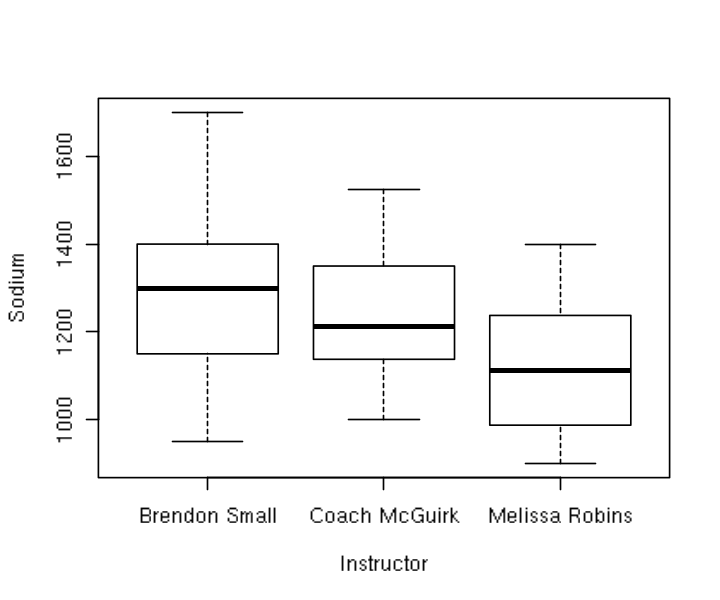

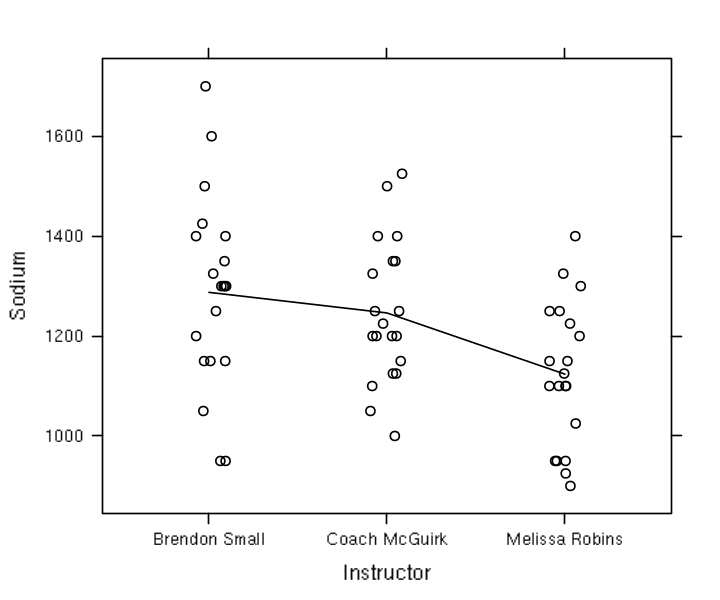

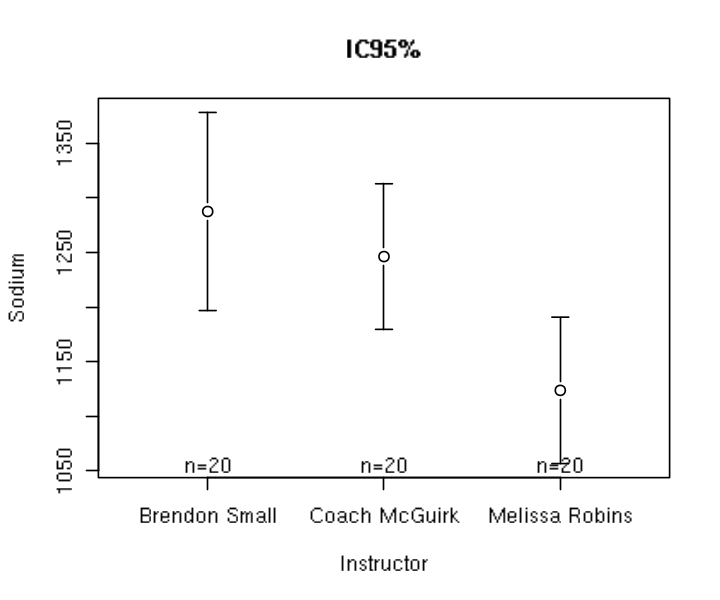



ANOVA unifatorial independente de Welch

VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus

 ONE-WAY ANOVA

 One-Way ANOVA (Welch's)                    
 ────────────────────────────────────────── 
             F       df1    df2     p       
 ────────────────────────────────────────── 
   Sodium    5.77      2    37.4    0.007   
 ────────────────────────────────────────── 


 Group Descriptives                                        
 ───────────────────────────────────────────────────────── 
             Instructor        N     Mean    SD     SE     
 ───────────────────────────────────────────────────────── 
   Sodium    Brendon Small     20    1288    194    43.3   
             Coach McGuirk     20    1246    142    31.8   
             Melissa Robins    20    1124    143    32.0   
 ───────────────────────────────────────────────────────── 


 POST HOC TESTS

 Games-Howell Post-Hoc Test – Sodium                                               

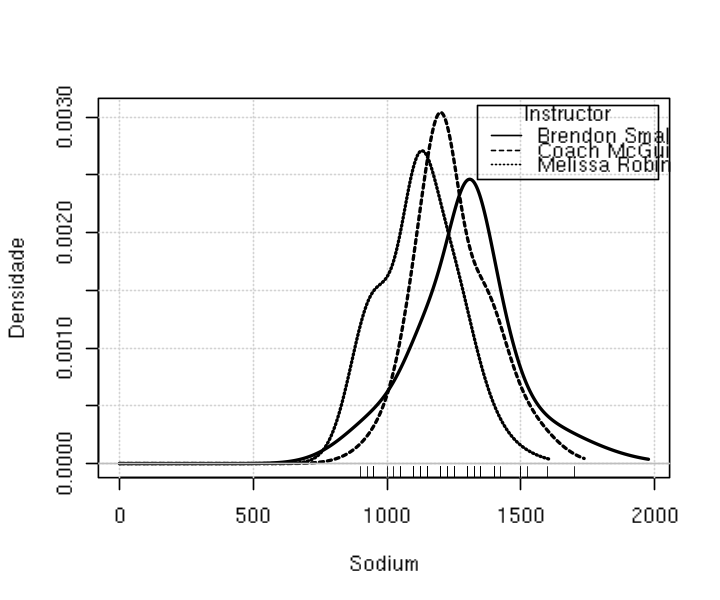



Selecao de modelo
- R^2 ajustado = 0.1104092 
- omega^2 =  0.1079091 



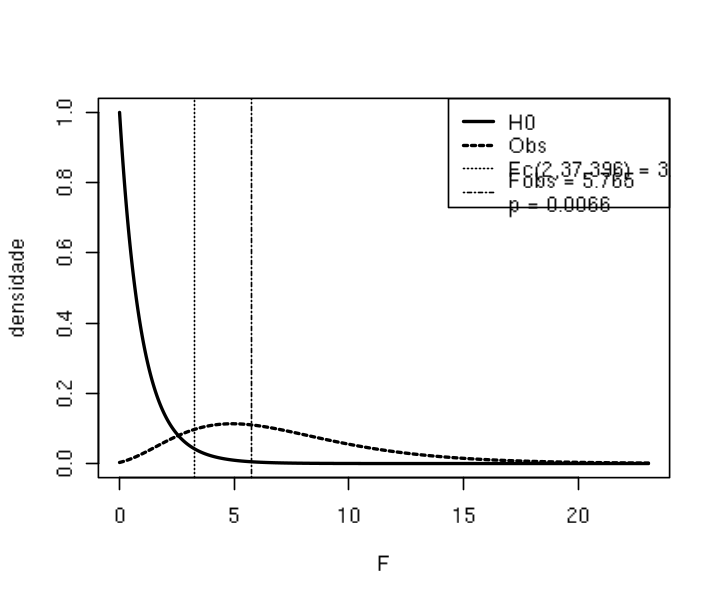

In [9]:
# ANOVA1f_indep_Welch_sodio.R
# para ajustar este RScript para outros dados
# troque a planilha xlsx e substitua as palavras
# Instructor pela nova VI (fator)
# Sodium pela nova VD (resposta)

library(psych)
library(lattice)
library(car)
library(gplots)
library(jmv)
library(readxl)

# suppress warnings
options(warn=-1)

TH <- read_excel("Nutricao3.xlsx")
TH$Instructor <- factor(TH$Instructor, levels=unique(TH$Instructor))

print(with(TH, psych::describeBy(Sodium,Instructor,digits=2)))
boxplot(Sodium~Instructor,data=TH,
        ylab=names(TH)[which(names(TH)=="Sodium")],
        xlab=names(TH)[which(names(TH)=="Instructor")]
)
print(grf <- lattice::xyplot(Sodium~Instructor, data=TH, type=c("p","a"),
                             jitter.x=TRUE, col="black"))
with(TH, gplots::plotmeans(Sodium~Instructor,
                           error.bars="conf.int", level=.95,
                           connect=FALSE,
                           ylab=names(TH)[which(names(TH)=="Sodium")],
                           xlab=names(TH)[which(names(TH)=="Instructor")],
                           main="IC95%",
                           barcol="black"))
car::densityPlot(Sodium~Instructor, data=TH, rug=TRUE, from=0, normalize=TRUE,
                 na.rm=TRUE, ylab="Densidade", col=c("black", "black", "black"))
cat("\n")

cat("\nANOVA unifatorial independente de Welch\n\n")
alfa <- 0.05
VD <- names(TH)[which(names(TH)=="Sodium")]
VI <- names(TH)[which(names(TH)=="Instructor")]
cat("VD =", VD,"\n")
cat("Fator =", VI,"\n")
cat("\nAnalise de significancia estatistica: teste omnibus\n")
print(res <- jmv::anovaOneW(formula = Sodium~Instructor, data=TH,
                       desc=TRUE, descPlot = FALSE, phMethod ='gamesHowell',
                       phMeanDif = TRUE, phTest=TRUE, phFlag=TRUE))
cat("\nAnalise de significancia pratica: tamanho de efeito\n")
F <- as.numeric(res$anova$asDF[2])
dfn <- as.numeric(res$anova$asDF[3])
dfd <- as.numeric(res$anova$asDF[4])
eta2 <- dfn*F/(dfn*F+dfd)
if (0 <= eta2 & eta2 < 0.1) {geta2 <- "minimo"}
if (0.1 <= eta2 & eta2 < 0.6) {geta2 <- "pequeno"}
if (0.6 <= eta2 & eta2 < 0.14) {geta2 <- "intermediario"}
if (0.14 <= eta2 & eta2 <= 1.0) {geta2 <- "grande"}
cat("- eta^2 =", eta2, "\nGrau", geta2,
    "de explicacao da variancia da VD", VD,"pela VI", VI,"\n")
f2 <- eta2/(1-eta2) # tamanho de efeito f de Cohen
ncp <- dfd*f2 # parametro de nao-centralidade
fc <- qf(1-alfa, dfn, dfd, 0)
p <- 1-pf(F,dfn,dfd,0)
if (p < 1e-4)
{
  p <- sprintf("%.2e",p)
} else
{
  p <- sprintf("%.4f",p)
}
f <- seq(0,2*ncp,0.01)
densf <- df(f, dfn, dfd, 0)
plot(f, densf, xlab="F", ylab="densidade", lwd=2, type="l")
densf <- df(f, dfn, dfd, ncp)
lines(f,densf, lwd=2, lty=2)
abline(v=fc, lty=3)
abline(v=F, lty=4)
legend("topright",
       c("H0", "Obs", 
         paste("Fc(",dfn,",",round(dfd,3),") = ",round(fc,3),sep=""), 
         paste("Fobs = ",round(F,3),"\n",
               "p = ",p,sep="") 
         ), 
       lwd=c(2,2,1,1), lty=c(1,2,3,4))
cat("\n\nSelecao de modelo\n")
R2aj <- (F-1)/((F-1)+dfd+1)
cat("- R^2 ajustado =", R2aj, "\n")
omega2 <- (F-1)/((F-1)+dfd+2)
cat("- omega^2 = ", omega2,"\n\n")
# enable warnings
options(warn=0)

Obtém-se:


 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1123.75 143.15 1112.5 1120.31 185.32 900 1400   500 0.08     -1.1
      se
X1 32.01


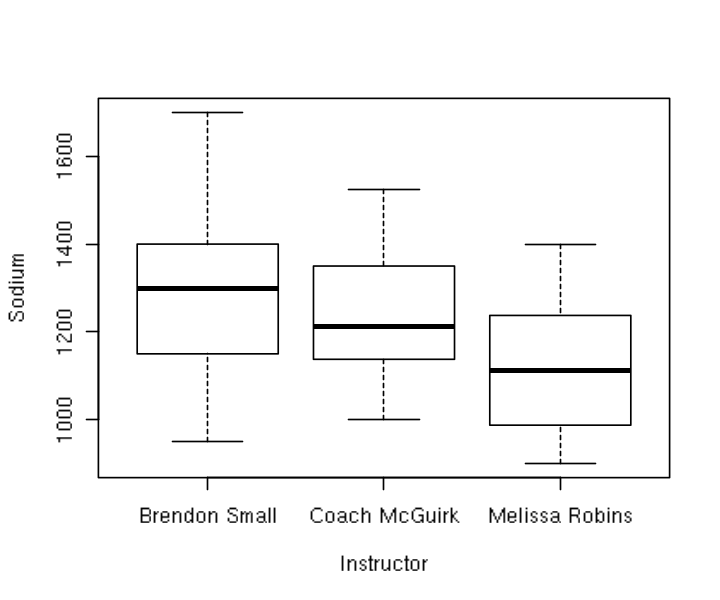

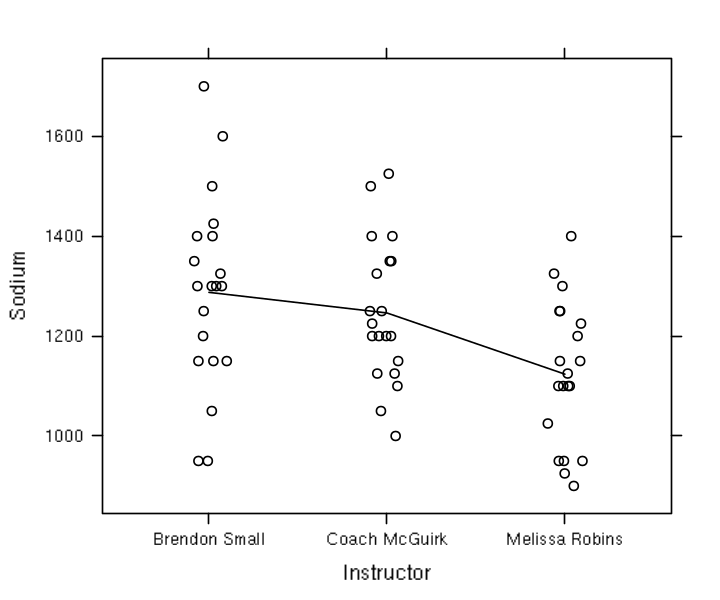

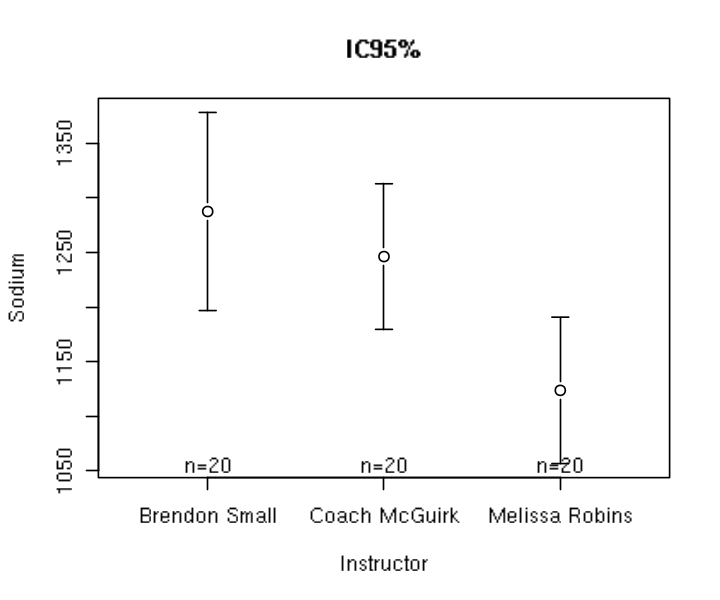



ANOVA unifatorial independente de Welch

VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus

 ONE-WAY ANOVA

 One-Way ANOVA (Welch's)                    
 ────────────────────────────────────────── 
             F       df1    df2     p       
 ────────────────────────────────────────── 
   Sodium    5.77      2    37.4    0.007   
 ────────────────────────────────────────── 


 Group Descriptives                                        
 ───────────────────────────────────────────────────────── 
             Instructor        N     Mean    SD     SE     
 ───────────────────────────────────────────────────────── 
   Sodium    Brendon Small     20    1288    194    43.3   
             Coach McGuirk     20    1246    142    31.8   
             Melissa Robins    20    1124    143    32.0   
 ───────────────────────────────────────────────────────── 


 POST HOC TESTS

 Games-Howell Post-Hoc Test – Sodium                                               

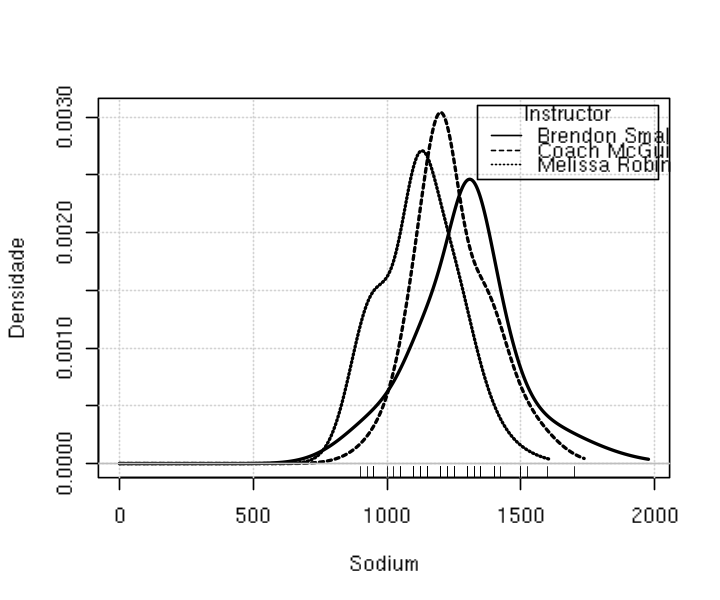



Selecao de modelo
- R^2 ajustado = 0.1104092 
- omega^2 =  0.1079091 



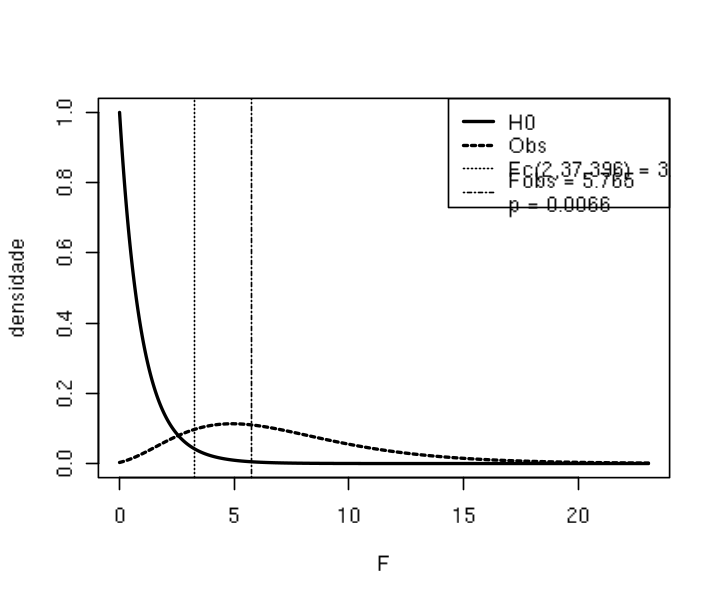

In [10]:
source("ANOVA1f_indep_Welch_sodio.R")

Analise a saída deste *RScript* e encontre:

- a mesma estatística descritiva do *RScript* anterior.
- os valores da ANOVA de Welch, com o valor $F\text{ calculado}$=(`r dfn`,`r round(dfd,2)`)=`r round(res$anova$asDF[2],4)` e o valor $p$=`r res$anova$asDF[5]` (note o número fracionário para os graus de liberdade do denominados, da mesma forma que acontece com o teste $t$ de Welch).
- os testes *post hoc*, na fomra de uma matriz relacionando os pares de programas (Small, McGuirk e Robins), mostrando:
    - a diferença média
    - o valor da estatística $t$ (são feitos testes $t$ par-a-par)
    - os graus de liberdade fracionários ($t$ de Welch)
    - os valores $p$, já corrigidos para serem interpretados em comparação com $\alpha$=`r alfa`.
- o valor estimado para o tamanho de efeito do teste *omnibus*, dado por $\eta^2$=`r eta2`.
    
A conclusão, neste exemplo, é similar à obtida com o **teste de ANOVA de Fisher-White**: o programa adotado por Melissa Robins obteve ingestas de sódio significantemente menores que a dos outros dois instrutores.

### ANOVA independente, sem os dados brutos

É muito comum, em publicações, que somente tenhamos acesso às medidas-resumo (número de participantes, média, desvio-padrão e correlação). Nestes casos, os *RScripts* acima não são utilizáveis. 

Para fazer os testes quando os dados brutos não estão disponíveis, criamos os seguintes scripts:

* [ANOVA_Unifatorial_Welch_SemDadosBrutos_Schizo.R](ANOVA_Unifatorial_Welch_SemDadosBrutos_Schizo.R)
* [ANOVA_Unifatorial_Fisher_SemDadosBrutos_Schizo.R](ANOVA_Unifatorial_Fisher_SemDadosBrutos_Schizo.R)

## ANOVA unifatorial relacionada ou para medidas repetidas

Utilizada quando os participantes são avaliados
sob todas as condições experimentais, i.e., um
delineamento intraparticipantes.

Neste delineamento a variação entre os grupos não é devida às diferenças individuais (cada participante em cada grupo é o mesmo), e a fórmula para o cálculo da estatística $F$ leva este fato em consideração. 

O delineamento com medidas repetidas leva a um teste com maior poder.

No entanto, como o mesmo participante é controle de si mesmo e submetido a todas as condições experimentais, sugere-se que esta ordem de submissão, se possível, seja aleatorizada.

### Suposições

– as diferenças dos valores das VDs são independentes entre as unidades observacionais.
– as diferenças dos valores das VDs têm distribuição normal multivariada.
– esfericidade: homocedasticidade das variâncias das diferenças das VDs (uma explicação sem muita matemática está em https://en.wikipedia.org/wiki/Mauchly%27s_sphericity_test)

> “O teste t é ainda um teste válido, mesmo com modestas violações na
suposição de normalidade, particularmente quando os tamanhos dos
grupos são iguais e existe um número razoável de participantes em
cada grupo; por “razoável” entendemos que [para um delineamento] completamente intraparticipantes, [deve haver] pelo menos 22 participantes ao todo.” (Dancey & Reidy, 2019, p. 472)

### Situação

***

<img src="./image/coruja.png" alt="Drawing" style="width: 75px;float: left;"/>  
<div class="alert alert-block alert-success">

Usaremos os mesmos dados do exemplo anterior, mas supondo que as 20 medidas de ingesta de sódio sejam do mesmo participante, submetido aos três diferentes programas educacionais. Então, a normalidade multivariada das três diferenças não pode ser assumida, pois há 20 unidades observacionais no estudo.
</div>

***

<center><img src="./image/snaped.png" alt="Drawing" style="width: 100px; float: left;"/></center>

* O SNAP-Ed (Supplemental Nutrition Assistance Program Education) é um programa baseado em evidências que ajuda as pessoas a terem uma vida mais saudável.

* O SNAP-Ed ensina às pessoas que usam ou qualificam para o SNAP uma boa nutrição e como fazer com que o seu dinheiro de alimentação se estenda ainda mais.

* Os participantes do SNAP-Ed também aprendem a ser fisicamente ativos.
<div align=right><small>https://www.fns.usda.gov/snap/supplemental-nutrition-assistance-program-education-snap-ed</small></div>

### Planejamento

Brendon Small, Coach McGuirk e Melissa Robins fazem com que seus alunos do SNAP-Ed mantenham diários do que comem por uma semana e depois calculem a ingestão diária de sódio em miligramas.

Estudantes atenderam os diferentes programas de educação nutricional suscessivamente, e os instrutores querem ver se a ingestão média de sódio é a mesma quando cada um dos três programas foi seguido.

### Hipóteses nula e alternativa

O delineamento do estudo é diferente, mas as hipóteses são as mesmas: 

$$H_0: \mu_{\text{Small}} = \mu_{\text{McGuirk}} = \mu_{\text{Robins}}$$
$$H_1: \exists |\mu_i \ne \mu_j; i \ne j; i,j=1,2,3$$

# Operacionalização do teste

### ANOVA unifatorial relacionada ou para medidas repetidas, balanceadas

A planilha a ser utilizada é *[Nutricao3par.R](Nutricao3par.R)*. Verifique a coluna *Student*, que foi alterada para indicar o participante nos três programas (compare com *[Nutricao3.R](Nutricao3.R)*, usada para ANOVA independente).

As bibliotecas (*libraries*) necessárias são *lmerTest* e *ez*, e o trecho que aplica o método estatístico é:

```{R}
res <- lmerTest::lmer(Sodium~Instructor + (1|Student), data=TH, REML=TRUE)
```

Executando:

Loading required package: lmerTest

Loading required package: lme4

Loading required package: Matrix

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Loading required package: ez




 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1123.75 143.15 1112.5 1120.31 185.32 900 1400   500 0.08     -1.1
      se
X1 32.01


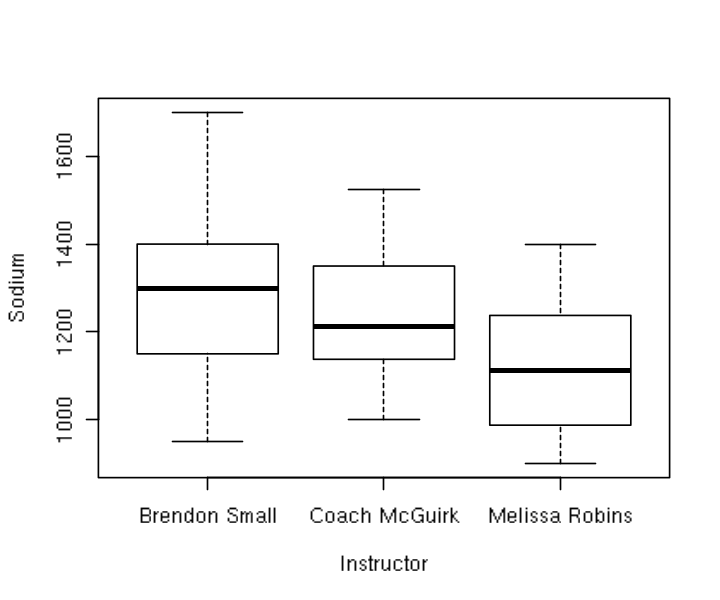

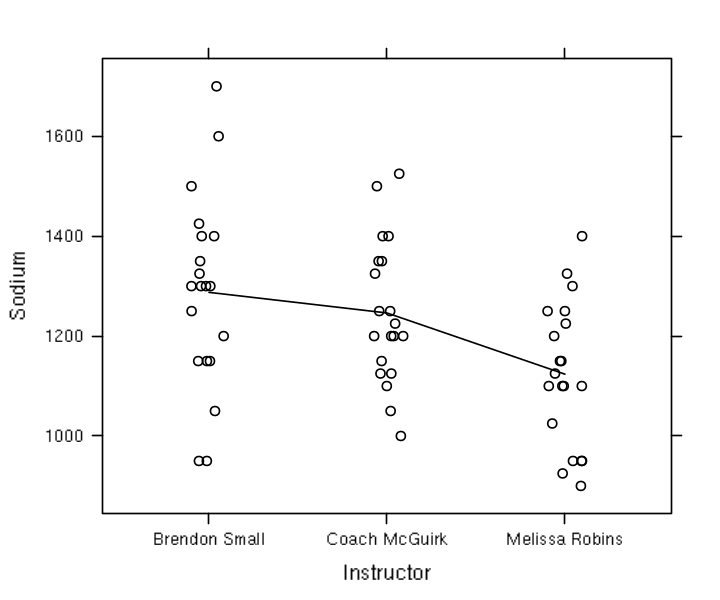



Teste omnibus por GLMM com efeito aleatorio
VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF DenDF F value    Pr(>F)    
Instructor 290146  145073     2    38  30.581 1.217e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA-like table for random-effects: Single term deletions

Model:
Sodium ~ Instructor + (1 | Student)
              npar  logLik    AIC    LRT Df Pr(>Chisq)    
<none>           5 -352.02 714.05                         
(1 | Student)    4 -375.21 758.42 46.376  1  9.763e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Teste post hoc

Least Squares Means table:

                                                   Estimate Std. Error df
InstructorBrendon Small - InstructorCoach McGuirk   41.2500    21.7807 38
InstructorBrendon Small - InstructorMelissa Robins 163.7500    21.7807 38
I

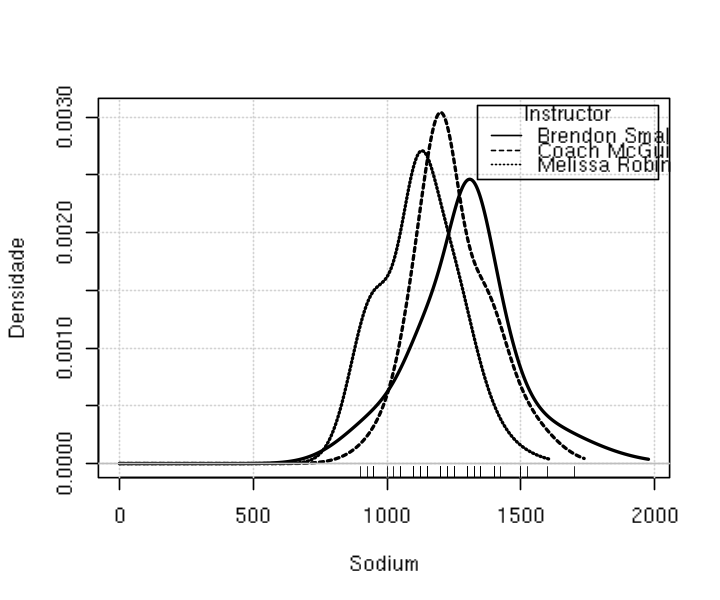



Selecao de modelo
- R^2 ajustado = 0.4313252 
- omega^2 =  0.4251262 

Teste omnibus por GLM univariado
$ANOVA
       Effect DFn DFd        SSn       SSd          F            p p<.05
1 (Intercept)   1  19 89182041.7 1307541.7 1295.91189 6.002751e-19     *
2  Instructor   2  38   290145.8  180270.8   30.58049 1.217342e-08     *
        ges
1 0.9835909
2 0.1631905

$`Mauchly's Test for Sphericity`
      Effect         W            p p<.05
2 Instructor 0.3889714 0.0002038255     *

$`Sphericity Corrections`
      Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF] p[HF]<.05
2 Instructor 0.6207214 3.881854e-06         * 0.6427565 2.772133e-06         *



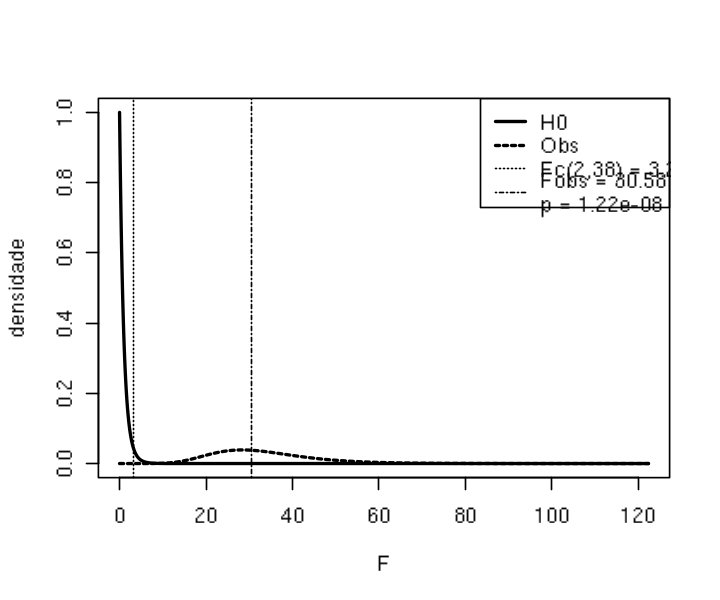

In [11]:
if (!require("lmerTest")) install.packages("lmerTest",repo="https://vps.fmvz.usp.br/CRAN/",dep=TRUE)
if (!require("ez")) install.packages("ez",repo="https://vps.fmvz.usp.br/CRAN/",dep=TRUE)

# ANOVA1f_dep_balanc_sodio.R
# para ajustar este RScript para outros dados
# troque a planilha xlsx e substitua as palavras
# Instructor pela nova VI (fator)
# Sodium pela nova VD (resposta)

library(psych)
library(lattice)
library(car)
library(lmerTest)
library(ez)
library(readxl)

# suppress warnings
options(warn=-1)

TH <- read_excel("Nutricao3par.xlsx")
TH$Instructor <- factor(TH$Instructor, levels=unique(TH$Instructor))

print(with(TH, psych::describeBy(Sodium,Instructor,digits=2)))
boxplot(Sodium~Instructor,data=TH,
        ylab=names(TH)[which(names(TH)=="Sodium")],
        xlab=names(TH)[which(names(TH)=="Instructor")]
)
print(grf <- lattice::xyplot(Sodium~Instructor, data=TH, type=c("p","a"),
                             jitter.x=TRUE, col="black"))
car::densityPlot(Sodium~Instructor, data=TH, rug=TRUE, from=0, normalize=TRUE,
                 na.rm=TRUE, ylab="Densidade", col=c("black", "black", "black"))
cat("\n")

cat(paste("\nTeste omnibus por GLMM com efeito aleatorio\n"))
alfa <- 0.05
VD <- names(TH)[which(names(TH)=="Sodium")]
VI <- names(TH)[which(names(TH)=="Instructor")]
cat("VD =", VD,"\n")
cat("Fator =", VI,"\n")
cat("\nAnalise de significancia estatistica: teste omnibus\n")
res <- lmerTest::lmer(Sodium~Instructor + (1|Student), data=TH, REML=TRUE)
cat("\n"); print(res1 <- stats::anova(res)); cat("\n")
print(lmerTest::rand(res))
cat(paste("\nTeste post hoc\n\n"))
print(out <- lmerTest::difflsmeans(res))
dfn <- as.numeric(res1[3])
dfd <- as.numeric(res1[4])
F <- as.numeric(res1[5])
cat("\nAnalise de significancia pratica: tamanho de efeito\n")
eta2 <- dfn*F/(dfn*F+dfd)
if (0 <= eta2 & eta2 < 0.1) {geta2 <- "minimo"}
if (0.1 <= eta2 & eta2 < 0.6) {geta2 <- "pequeno"}
if (0.6 <= eta2 & eta2 < 0.14) {geta2 <- "intermediario"}
if (0.14 <= eta2 & eta2 <= 1.0) {geta2 <- "grande"}
cat("\neta^2 =", eta2, "\nGrau", geta2,
    "de explicacao da variancia da VD", VD,"pela VI", VI,"\n")
f2 <- eta2/(1-eta2) # tamanho de efeito f de Cohen
ncp <- dfd*f2 # parametro de nao-centralidade
fc <- qf(1-alfa, dfn, dfd, 0)
p <- 1-pf(F,dfn,dfd,0)
if (p < 1e-4)
{
  p <- sprintf("%.2e",p)
} else
{
  p <- sprintf("%.4f",p)
}
f <- seq(0,2*ncp,0.01)
densf <- df(f, dfn, dfd, 0)
plot(f, densf, xlab="F", ylab="densidade", lwd=2, type="l")
densf <- df(f, dfn, dfd, ncp)
lines(f,densf, lwd=2, lty=2)
abline(v=fc, lty=3)
abline(v=F, lty=4)
legend("topright",
       c("H0", "Obs", 
         paste("Fc(",dfn,",",round(dfd,3),") = ",round(fc,3),sep=""), 
         paste("Fobs = ",round(F,3),"\n",
               "p = ",p,sep="") 
         ), 
       lwd=c(2,2,1,1), lty=c(1,2,3,4))
cat("\n\nSelecao de modelo\n")
R2aj <- (F-1)/((F-1)+dfd+1)
cat("- R^2 ajustado =", R2aj, "\n")
omega2 <- (F-1)/((F-1)+dfd+2)
cat("- omega^2 = ", omega2,"\n\n")
cat("Teste omnibus por GLM univariado\n")
# ezANOVA: apenas para medidas repetidas balanceadas
print(res <- ez::ezANOVA(data=TH, dv=Sodium, wid=Student, within=Instructor,
                         detailed=TRUE, type=3))
# enable warnings
options(warn=0)

Obtém-se:


 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1123.75 143.15 1112.5 1120.31 185.32 900 1400   500 0.08     -1.1
      se
X1 32.01


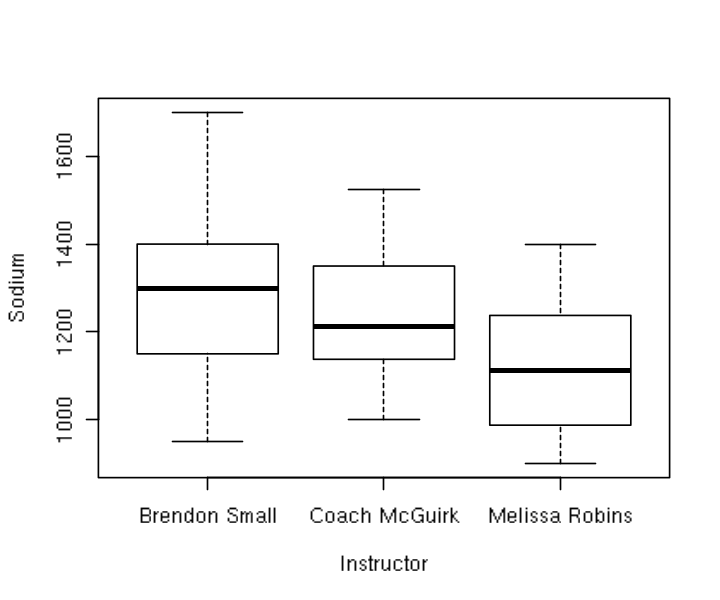

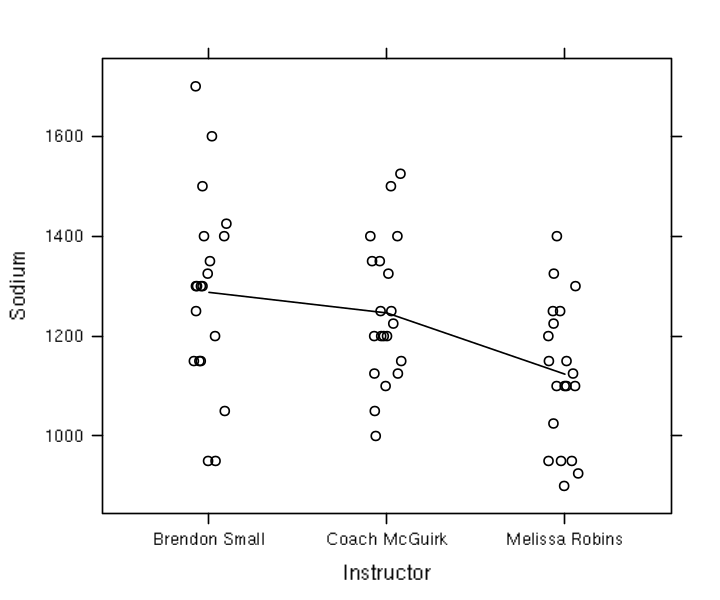



Teste omnibus por GLMM com efeito aleatorio
VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF DenDF F value    Pr(>F)    
Instructor 290146  145073     2    38  30.581 1.217e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA-like table for random-effects: Single term deletions

Model:
Sodium ~ Instructor + (1 | Student)
              npar  logLik    AIC    LRT Df Pr(>Chisq)    
<none>           5 -352.02 714.05                         
(1 | Student)    4 -375.21 758.42 46.376  1  9.763e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Teste post hoc

Least Squares Means table:

                                                   Estimate Std. Error df
InstructorBrendon Small - InstructorCoach McGuirk   41.2500    21.7807 38
InstructorBrendon Small - InstructorMelissa Robins 163.7500    21.7807 38
I

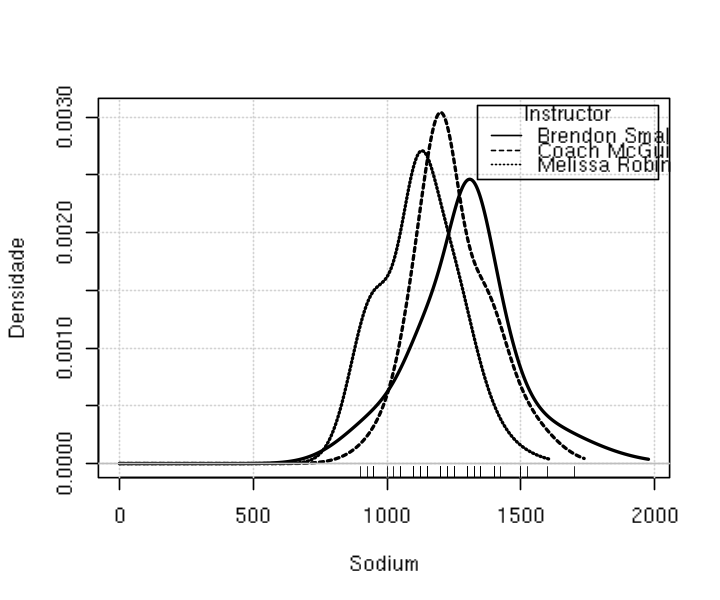



Selecao de modelo
- R^2 ajustado = 0.4313252 
- omega^2 =  0.4251262 

Teste omnibus por GLM univariado
$ANOVA
       Effect DFn DFd        SSn       SSd          F            p p<.05
1 (Intercept)   1  19 89182041.7 1307541.7 1295.91189 6.002751e-19     *
2  Instructor   2  38   290145.8  180270.8   30.58049 1.217342e-08     *
        ges
1 0.9835909
2 0.1631905

$`Mauchly's Test for Sphericity`
      Effect         W            p p<.05
2 Instructor 0.3889714 0.0002038255     *

$`Sphericity Corrections`
      Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF] p[HF]<.05
2 Instructor 0.6207214 3.881854e-06         * 0.6427565 2.772133e-06         *



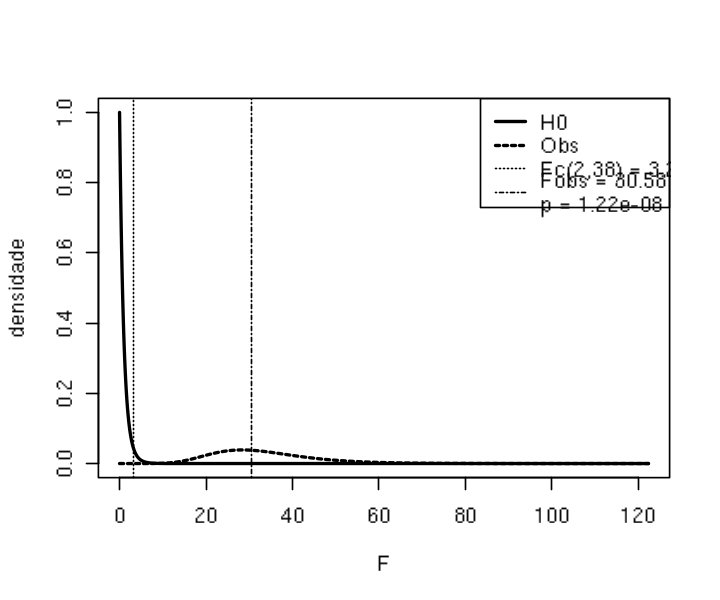

In [12]:
source("ANOVA1f_dep_balanc_sodio.R")

Analise a saída deste *RScript* e encontre:
  
- a estatística descritiva (sempre a mesma).
- observe o valor de $F\text{ calculado}$ e valor-$p$ correspondentes (neste exemplo fictício, os dados são os mesmos da ANOVA independente).
- localize e interprete os testes *post hoc*; compare com os valores $p$ da ANOVA independente.
- aparece um novo trecho, "Teste omnibus por GLM univariado".

### ANOVA unifatorial relacionada ou para medidas repetidas, desbalanceadas

Vamos usar os mesmos dados, mas eliminar uma única medida (removemos o estudante **a** de Melissa Robins, planilha [Nutricao3parD.xlsx](Nutricao3parD.xlsx)).  

Para lidar com esta situação, o *RScript* execute:


 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 19 1135.53 136.76   1125 1132.35 148.26 925 1400   475 0.08    -1.04
      se
X1 31.37


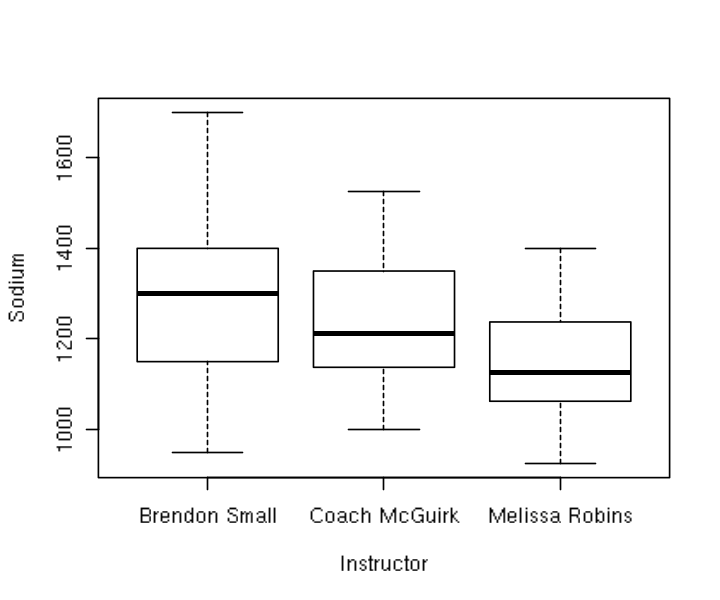

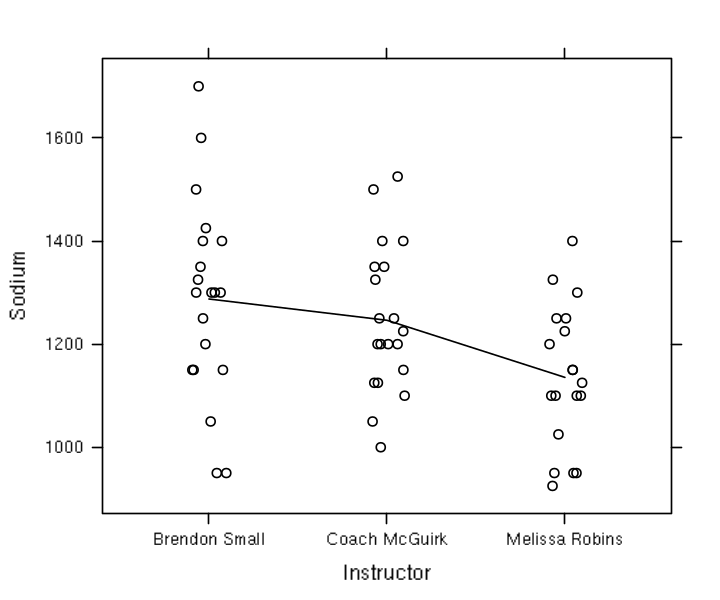



Teste omnibus por GLMM com efeito aleatorio
VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
Instructor 254746  127373     2 37.086  27.369 4.998e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA-like table for random-effects: Single term deletions

Model:
Sodium ~ Instructor + (1 | Student)
              npar  logLik    AIC    LRT Df Pr(>Chisq)    
<none>           5 -345.58 701.16                         
(1 | Student)    4 -368.17 744.34 45.177  1    1.8e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Teste post hoc

Least Squares Means table:

                                                   Estimate Std. Error   df
InstructorBrendon Small - InstructorCoach McGuirk   41.2500    21.5730 37.0
InstructorBrendon Small - InstructorMelissa Robins 157.5073    21.980

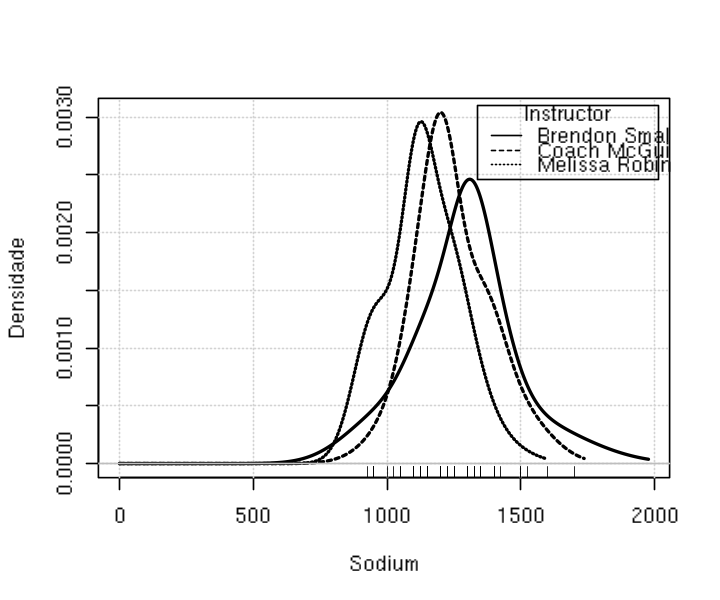



Selecao de modelo
- R^2 ajustado = 0.4091071 
- omega^2 =  0.4028569 



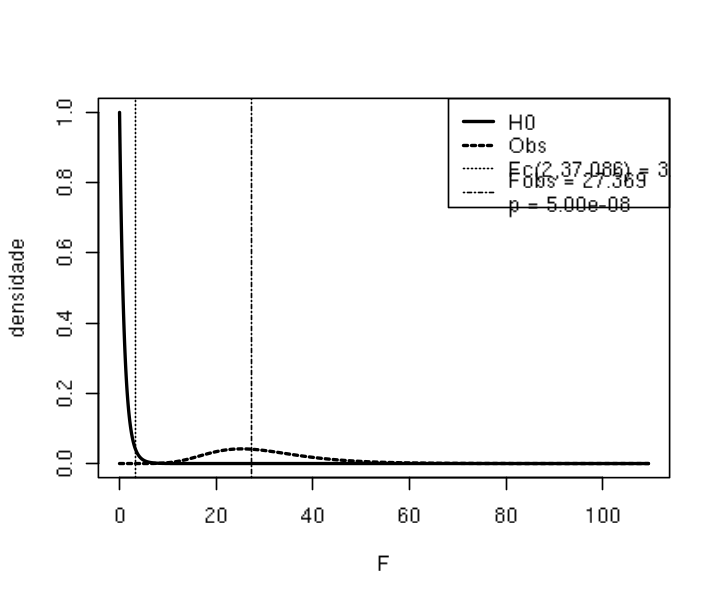

In [13]:
if (!require("lmerTest")) install.packages("lmerTest",repo="https://vps.fmvz.usp.br/CRAN/", dep=TRUE)
# ANOVA1f_dep_desbalanc_sodio.R
# para ajustar este RScript para outros dados
# troque a planilha xlsx e substitua as palavras
# Instructor pela nova VI (fator)
# Sodium pela nova VD (resposta)

library(psych)
library(lattice)
library(car)
library(lmerTest)
library(readxl)

# suppress warnings
options(warn=-1)

TH <- read_excel("Nutricao3parD.xlsx")
TH$Instructor <- factor(TH$Instructor, levels=unique(TH$Instructor))

print(with(TH, psych::describeBy(Sodium,Instructor,digits=2)))
boxplot(Sodium~Instructor,data=TH,
        ylab=names(TH)[which(names(TH)=="Sodium")],
        xlab=names(TH)[which(names(TH)=="Instructor")]
)
print(grf <- lattice::xyplot(Sodium~Instructor, data=TH, type=c("p","a"),
                             jitter.x=TRUE, col="black"))
car::densityPlot(Sodium~Instructor, data=TH, rug=TRUE, from=0, normalize=TRUE,
                 na.rm=TRUE, ylab="Densidade", col=c("black", "black", "black"))
cat("\n")

cat(paste("\nTeste omnibus por GLMM com efeito aleatorio\n"))
alfa <- 0.05
VD <- names(TH)[which(names(TH)=="Sodium")]
VI <- names(TH)[which(names(TH)=="Instructor")]
cat("VD =", VD,"\n")
cat("Fator =", VI,"\n")
cat("\nAnalise de significancia estatistica: teste omnibus\n")
res <- lmerTest::lmer(Sodium~Instructor + (1|Student), data=TH, REML=TRUE)
cat("\n"); print(res1 <- stats::anova(res)); cat("\n")
print(lmerTest::rand(res))
cat(paste("\nTeste post hoc\n\n"))
print(out <- lmerTest::difflsmeans(res))
dfn <- as.numeric(res1[3])
dfd <- as.numeric(res1[4])
F <- as.numeric(res1[5])
cat("\nAnalise de significancia pratica: tamanho de efeito\n")
eta2 <- dfn*F/(dfn*F+dfd)
if (0 <= eta2 & eta2 < 0.1) {geta2 <- "minimo"}
if (0.1 <= eta2 & eta2 < 0.6) {geta2 <- "pequeno"}
if (0.6 <= eta2 & eta2 < 0.14) {geta2 <- "intermediario"}
if (0.14 <= eta2 & eta2 <= 1.0) {geta2 <- "grande"}
cat("\neta^2 =", eta2, "\nGrau", geta2,
    "de explicacao da variancia da VD", VD,"pela VI", VI,"\n")
f2 <- eta2/(1-eta2) # tamanho de efeito f de Cohen
ncp <- dfd*f2 # parametro de nao-centralidade
fc <- qf(1-alfa, dfn, dfd, 0)
p <- 1-pf(F,dfn,dfd,0)
if (p < 1e-4)
{
  p <- sprintf("%.2e",p)
} else
{
  p <- sprintf("%.4f",p)
}
f <- seq(0,2*ncp,0.01)
densf <- df(f, dfn, dfd, 0)
plot(f, densf, xlab="F", ylab="densidade", lwd=2, type="l")
densf <- df(f, dfn, dfd, ncp)
lines(f,densf, lwd=2, lty=2)
abline(v=fc, lty=3)
abline(v=F, lty=4)
legend("topright",
       c("H0", "Obs", 
         paste("Fc(",dfn,",",round(dfd,3),") = ",round(fc,3),sep=""), 
         paste("Fobs = ",round(F,3),"\n",
               "p = ",p,sep="") 
         ), 
       lwd=c(2,2,1,1), lty=c(1,2,3,4))
cat("\n\nSelecao de modelo\n")
R2aj <- (F-1)/((F-1)+dfd+1)
cat("- R^2 ajustado =", R2aj, "\n")
omega2 <- (F-1)/((F-1)+dfd+2)
cat("- omega^2 = ", omega2,"\n\n")
# enable warnings
options(warn=0)

É o mesmo _RScript_ usado para a ANOVA balanceada, exceto pelas linhas finais ("Teste omnibus por GLM univariado"). Obtém-se:


 Descriptive statistics by group 
group: Brendon Small
   vars  n   mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1287.5 193.73   1300 1284.38 166.79 950 1700   750 0.12    -0.46
      se
X1 43.32
------------------------------------------------------------ 
group: Coach McGuirk
   vars  n    mean     sd median trimmed    mad  min  max range skew kurtosis
X1    1 20 1246.25 142.41 1212.5 1240.62 148.26 1000 1525   525  0.3    -0.85
      se
X1 31.84
------------------------------------------------------------ 
group: Melissa Robins
   vars  n    mean     sd median trimmed    mad min  max range skew kurtosis
X1    1 20 1123.75 143.15 1112.5 1120.31 185.32 900 1400   500 0.08     -1.1
      se
X1 32.01


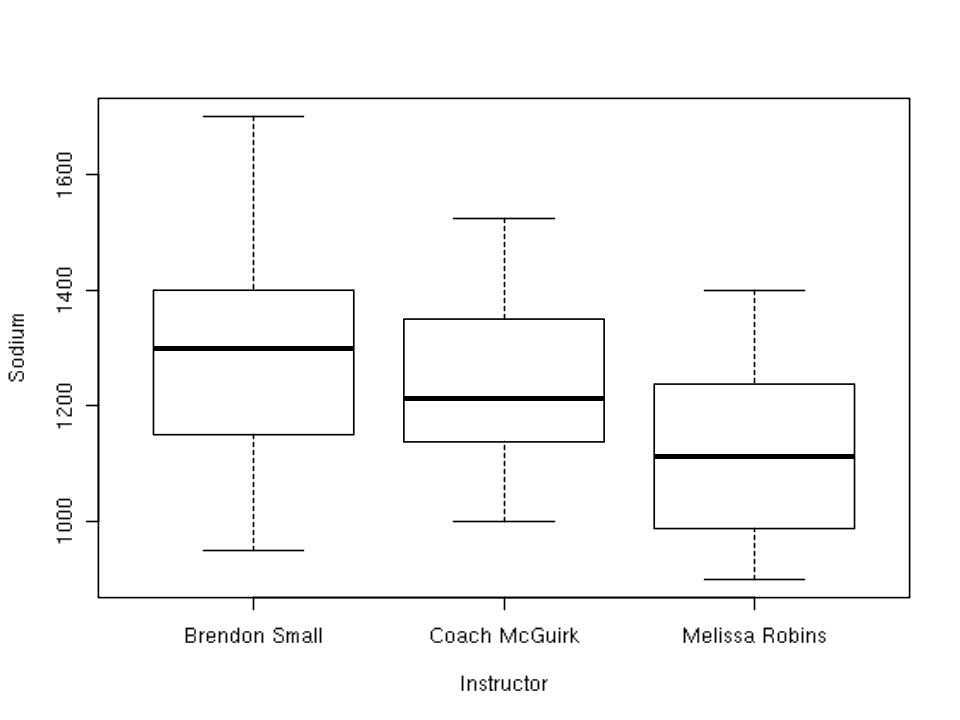

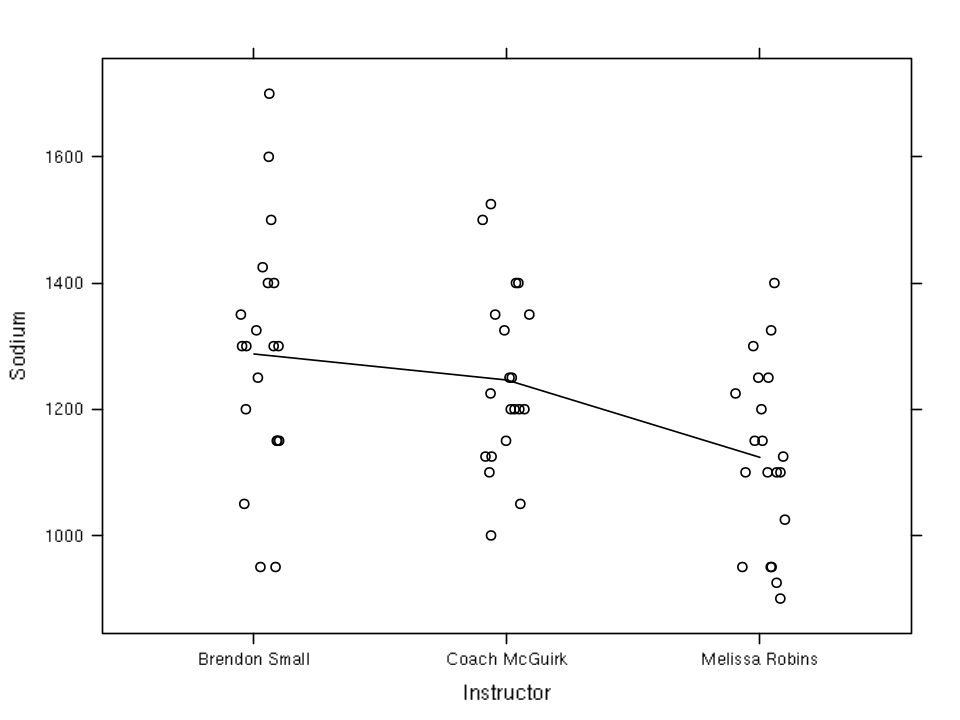



Teste omnibus por GLMM com efeito aleatorio
VD = Sodium 
Fator = Instructor 

Analise de significancia estatistica: teste omnibus

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF DenDF F value    Pr(>F)    
Instructor 290146  145073     2    38  30.581 1.217e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ANOVA-like table for random-effects: Single term deletions

Model:
Sodium ~ Instructor + (1 | Student)
              npar  logLik    AIC    LRT Df Pr(>Chisq)    
<none>           5 -352.02 714.05                         
(1 | Student)    4 -375.21 758.42 46.376  1  9.763e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Teste post hoc

Least Squares Means table:

                                                   Estimate Std. Error df
InstructorBrendon Small - InstructorCoach McGuirk   41.2500    21.7807 38
InstructorBrendon Small - InstructorMelissa Robins 163.7500    21.7807 38
I

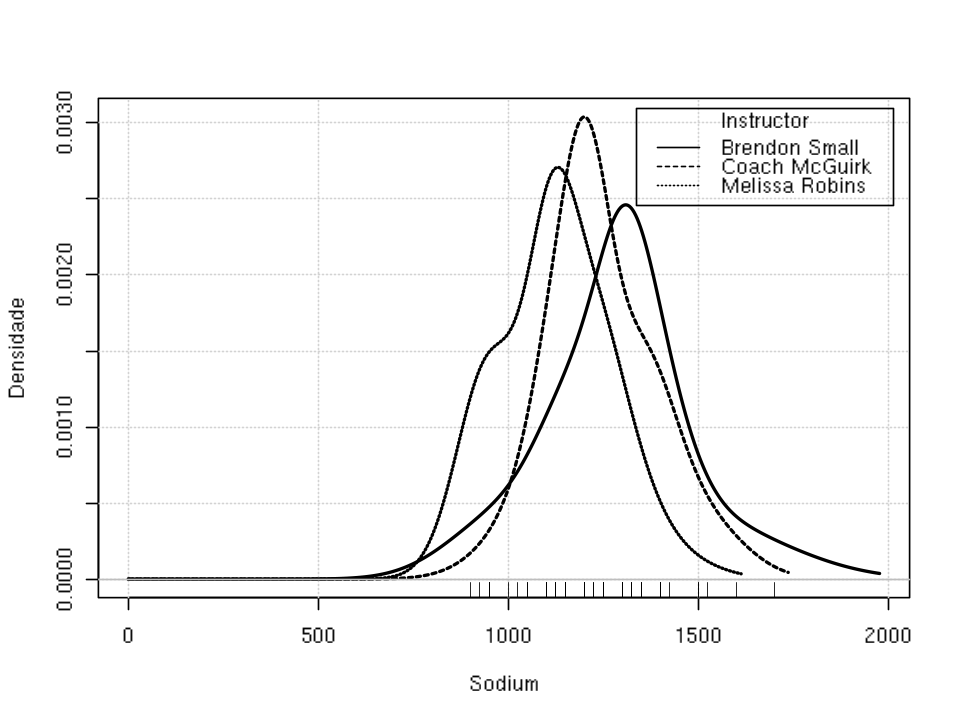



Selecao de modelo
- R^2 ajustado = 0.4313252 
- omega^2 =  0.4251262 

Teste omnibus por GLM univariado
$ANOVA
       Effect DFn DFd        SSn       SSd          F            p p<.05
1 (Intercept)   1  19 89182041.7 1307541.7 1295.91189 6.002751e-19     *
2  Instructor   2  38   290145.8  180270.8   30.58049 1.217342e-08     *
        ges
1 0.9835909
2 0.1631905

$`Mauchly's Test for Sphericity`
      Effect         W            p p<.05
2 Instructor 0.3889714 0.0002038255     *

$`Sphericity Corrections`
      Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF] p[HF]<.05
2 Instructor 0.6207214 3.881854e-06         * 0.6427565 2.772133e-06         *



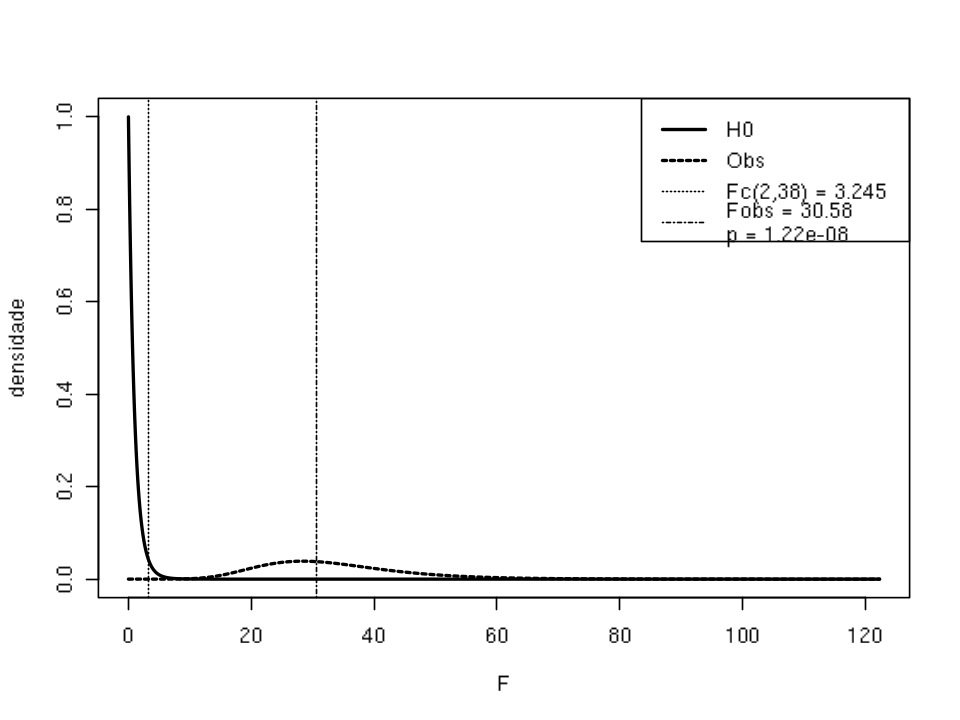

In [14]:
if (!require("ez")) install.packages("ez",repo="https://vps.fmvz.usp.br/CRAN/")

options(repr.plot.width=8, repr.plot.height=6)

source("ANOVA1f_dep_balanc_sodio.R")

#### Exemplo de relatório para a ANOVA unifatorial relacionada

**Vinte** participantes foram selecionados para um estudo com delineamento intrapartipantes com três condições experimentais. A ordem de aplicação das três condições experimentais em cada participante foi aleatorizada. As médias amostrais brutas mostram que **menor ingesta de sódio foi observada entre estudantes submetidos ao programa aplicado por Melissa Robins**. A **ingesta média de sódio dos estudantes de Brendon Small e do Coach McGuirk** são semelhantes. A ANOVA unifatorial para medidas repetidas mostrou que qualquer diferença
entre as condições experimentais é improvável de ter ocorrido apenas por erro
amostral, considerando a hipótese nula verdadeira, pois a estatística de teste
multivariado observada é **$F(2;38) = 30{,}581$ e o valor *p* associado é igual a $1{,}22 \times10^{-8}$**. O tamanho do efeito do fator intraparticipantes é estimado pelo eta ao
quadrado parcial cujo valor indica que **61,7% da variância da ingesta de sódio** é
explicada pelo efeito do fator fixo **Instrutor**. A análise post-hoc confirmou que as diferenças entre entre **os programas adotados por Robins e Small**, e entre **os adotados por Robins e McGuirk** são estatisticamente significantes. Não se observou diferença estatisticamente significante entre **os programas adotados por Small e McGuirk**.